# Análisis Exploratorio de Datos (EDA) sobre Cáncer de Mama

## Introducción

El cáncer de mama es una de las principales causas de mortalidad en mujeres a nivel mundial. Comprender los factores asociados y los patrones dentro de los datos recopilados puede ayudar a mejorar la detección temprana y las estrategias de tratamiento. En este análisis, utilizamos la base de datos 'SEER Breast Cancer Data' del repositorio IEEE Dataport para realizar un Análisis Exploratorio de Datos (EDA) con el objetivo de identificar tendencias y posibles relaciones entre las variables.

La base de datos utilizada para este análisis proviene del repositorio IEEE Dataport y se titula 'SEER Breast Cancer Data'. Esta base de datos recoge información detallada sobre casos de cáncer de mama, y su análisis requiere una limpieza inicial para garantizar la calidad y consistencia de los datos.


In [198]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [199]:
df= pd.read_csv("C:/Users/JUTHA/Documents/bootcamp Base de datos/Bootcamp_bases_de_datos/SEER Breast Cancer Dataset .csv")

In [200]:
df.head(3)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;;
0,"43,""Other (American Indian/AK Native, Asian/Pa...",Regional,40,Positive,Positive,19,11,1,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"47,""Other (American Indian/AK Native, Asian/Pa...",Regional,45,Positive,Positive,25,9,2,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25.0,Positive,Positive,4.0,1.0,2.0,Dead;


### 1.1 Tipos de Variables

#### Variables numéricas:
- **Age**: Edad del paciente en el diagnóstico
- **Tumor Size**: Tamaño del tumor en el momento del diagnóstico.
- **Regional Node Examined**: Número de ganglios linfáticos examinados
- **Regional Node Positive**: Numero de gangliso linfáticos con tumor.
- **Survival Months**: Supervivencia en meses

#### Variables categóricas:
- **Race**: Raza de las pacientes (e.g., White, Other [American Indian/AK Native, Asian/Pacific Islander]).
- **Marital Status**: Estado civil de las pacientes (e.g., Married [including common law], Single [never married], Other).
- **T Stage**: Clasificación en función del tamaño del tumor (e.g., T2, T1, Other).
- **N Stage**: Clasificación en función de los ganglios implicados (e.g., N1, N2, Other).
- **6th Stage**: Clasificación general del tumor (e.g., IIA, IIB, Other).
- **Grade**: Clasificación en función del Grado del tumor (e.g., Moderately differentiated [Grade II], Poorly differentiated [Grade III], Other).
- **A Stage**: Indica si el tumor es local o metastásico (e.g., Regional, Distant).
- **Estrogen Status**: Estatus del receptor de Estrógenos (Positive/Negative).
- **Progesterone Status**: status del receptor de Estrógenos (Positive/Negative).

#### Variable ojetivo:
- **Status**: Supervivencia actual del paciente (Alive/Dead).

 
### 1.2 Valores Faltantes

- La columna `unnamed: 3` presenta muchos valores faltantes.
- Existe información mal alojada en la variable `ages` (en forma de string).

Antes de nada haremos una copia del original y será donde realizaremos todas las modificaciones


In [201]:
df_1=df.copy()

In [202]:
df_1.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status;;'],
      dtype='object')

### 1.3 Plan de Acción

Primero, intentaremos obtener los datos alojados en forma de string en un nuevo DataFrame que más tarde fusionaremos al DataFrame original. Esto incluye todos los valores faltantes del DataFrame original.

Antes de proceder, haremos una copia del DataFrame original, donde realizaremos todas las modificaciones necesarias.

##   Metodología de Limpieza de Datos

### 2.1 Pasos Principales

1. Quitar espacios en las variables.
2. Convertir todas las cadenas a minúsculas.
3. Utilizar el método `replace` para modificar las variables de manera personalizada.


In [203]:
df_1.columns = df_1.columns.str.replace('Age', 'age')
df_1.columns = df_1.columns.str.replace('Race ', 'race')
df_1.columns = df_1.columns.str.replace('Marital Status', 'marital_status')
df_1.columns = df_1.columns.str.replace('T Stage', 't_stage')
df_1.columns = df_1.columns.str.replace('A Stage', 'a_stage')
df_1.columns = df_1.columns.str.replace('6th Stage', '6th_stage')
df_1.columns = df_1.columns.str.replace('Grade', 'grade')
df_1.columns = df_1.columns.str.replace('N Stage', 'n_stage')
df_1.columns = df_1.columns.str.replace('Tumor Size', 'tumor_size')
df_1.columns = df_1.columns.str.replace('Estrogen Status', 'e_status')
df_1.columns = df_1.columns.str.replace('Progesterone Status', 'p_status')
df_1.columns = df_1.columns.str.replace('Regional Node Examined', 'reg_node_examined')
df_1.columns = df_1.columns.str.replace('Reginol Node Positive', 'reg_node_positive')
df_1.columns = df_1.columns.str.replace('Survival Months', 'survival_m')
df_1.columns = df_1.columns.str.replace('Status;;', 'status')

Se busca todas las filas en la columna 'age' de df_1 que contienen la palabra "Other". Y creamos una variable que se llama filtered_df1 y creo una copia de esta que se llamará filtered_df1_c

In [204]:
### Se filtran filas con palabras en su primera celda, creamos variable filtered_df1
filtered_df1 = df_1[df_1["age"].str.contains("Other")]
filtered_df1.head(2)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,"43,""Other (American Indian/AK Native, Asian/Pa...",Regional,40,Positive,Positive,19,11,1,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"47,""Other (American Indian/AK Native, Asian/Pa...",Regional,45,Positive,Positive,25,9,2,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:

filtered_df1_c=filtered_df1.copy()

In [206]:
filtered_df1_c.head(2)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,"43,""Other (American Indian/AK Native, Asian/Pa...",Regional,40,Positive,Positive,19,11,1,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"47,""Other (American Indian/AK Native, Asian/Pa...",Regional,45,Positive,Positive,25,9,2,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si comparamos los dos DataFrames, df_1 y filtered_df_1, podemos observar que los datos en las columnas desde race hasta a_stage en filtered_df_1 no tienen sentido en el contexto actual. Al analizar la estructura de df_1, queda claro que estos valores deberían corresponder a las columnas:

- a_stage
- tumor_size
- e_status
- p_status
- reg_node_examined
- reg_node_positive
- survival_m
- status

Esto indica que, en el DataFrame filtered_df_1, los valores se encuentran desalineados y están ubicados en las columnas incorrectas.

El siguiente paso será realinear los datos correctamente, moviendo:

- Los valores de race a la columna a_stage.
- Los valores de marital_status a la columna tumor_size.
- Y así sucesivamente, para garantizar que los datos estén organizados de acuerdo con la estructura original.

In [207]:
filtered_df1_c['status'] = filtered_df1_c['a_stage']
filtered_df1_c['a_stage'] = None 

In [208]:
filtered_df1_c['survival_m'] = filtered_df1_c['grade']
filtered_df1_c['grade'] = None 

In [209]:
filtered_df1_c['reg_node_positive'] = filtered_df1_c['6th_stage']
filtered_df1_c['6th_stage'] = None 

In [210]:
filtered_df1_c['reg_node_examined'] = filtered_df1_c['n_stage']
filtered_df1_c['n_stage'] = None 

Después de ejecutar esta línea de código, el DataFrame filtered_df1_c tendrá nombres de columnas sin espacios al inicio ni al final. 

In [211]:
filtered_df1_c.columns = filtered_df1_c.columns.str.strip()

In [212]:
filtered_df1_c['p_status'] = filtered_df1_c['t_stage']
filtered_df1_c['t_stage'] = None 

In [213]:
filtered_df1_c['e_status'] = filtered_df1_c['Unnamed: 3']
filtered_df1_c['Unnamed: 3'] = None 

In [214]:
filtered_df1_c['tumor_size'] = filtered_df1_c['marital_status']
filtered_df1_c['marital_status'] = None 

In [215]:
filtered_df1_c['a_stage'] = filtered_df1_c['race']
filtered_df1_c['race'] = None 

Ahora hemos organizado todos los datos del DataFrame filtrado en sus respectivas variables. A continuación, procederemos con los siguientes pasos:

- Revisar el contenido de la columna Unnamed: Determinar qué información contiene esta columna y si es relevante para nuestro análisis.
- Examinar los valores en la variable age: Analizar el contenido del string para asegurarnos de que los datos sean consistentes y adecuados para el procesamiento.

Aunque antes quiero comprobar cuantos missing values tiene de 'Unnamed:  3' y 'age'.

In [216]:
filtered_df1_c['Unnamed: 3'].isnull().sum()

np.int64(320)

In [217]:
len(filtered_df1_c)

320

In [218]:
filtered_df1_c['age'].unique();


In [219]:
len(filtered_df1_c['age'])

320

In [220]:
filtered_df1_c['age'].isnull().count()

np.int64(320)

El objetivo  es crear un nuevo DataFrame a partir de un conjunto de datos en formato string. Cada línea del string representa una fila de datos.

In [221]:
import csv
from io import StringIO

Se utiliza StringIO para simular que el string es un archivo. Esto facilita la compatibilidad con métodos de lectura de datos.
Se inicializa un lector CSV (csv.reader) con un delimitador de coma (,), ya que los datos están separados por comas.

In [222]:
data='''43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '66,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T2,N1,IIB,Moderately differentiated; Grade II',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '44,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T3,N2,IIIA,Poorly differentiated; Grade III',
       '57,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N3,IIIC,Moderately differentiated; Grade II',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Poorly differentiated; Grade III',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T2,N3,IIIC,Poorly differentiated; Grade III',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N2,IIIA,Moderately differentiated; Grade II',
       '38,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N2,IIIA,Well differentiated; Grade I',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T4,N1,IIIB,Poorly differentiated; Grade III',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N1,IIB,Well differentiated; Grade I',
       '50,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T3,N1,IIIA,Poorly differentiated; Grade III',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Well differentiated; Grade I',
       '39,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Poorly differentiated; Grade III',
       '32,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N1,IIB,Poorly differentiated; Grade III',
       '44,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Well differentiated; Grade I',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '35,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '68,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T2,N2,IIIA,Well differentiated; Grade I',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Poorly differentiated; Grade III',
       '35,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '65,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '54,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Moderately differentiated; Grade II',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N3,IIIC,Poorly differentiated; Grade III',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N3,IIIC,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T3,N1,IIIA,Well differentiated; Grade I',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '64,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '68,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T3,N1,IIIA,Moderately differentiated; Grade II',
       '52,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '68,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '31,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Moderately differentiated; Grade II',
       '39,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '54,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '68,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Well differentiated; Grade I',
       '68,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N3,IIIC,Moderately differentiated; Grade II',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Poorly differentiated; Grade III',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Poorly differentiated; Grade III',
       '33,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '35,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '59,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Poorly differentiated; Grade III',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N2,IIIA,Poorly differentiated; Grade III',
       '66,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Poorly differentiated; Grade III',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T2,N1,IIB,Poorly differentiated; Grade III',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Separated,,T2,N1,IIB,Poorly differentiated; Grade III',
       '43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '31,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '44,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N2,IIIA,Poorly differentiated; Grade III',
       '69,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T2,N1,IIB,Moderately differentiated; Grade II',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Separated,,T2,N2,IIIA,Moderately differentiated; Grade II',
       '52,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N1,IIB,Poorly differentiated; Grade III',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Separated,,T3,N1,IIIA,Poorly differentiated; Grade III',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T2,N1,IIB,Well differentiated; Grade I',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Well differentiated; Grade I',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '52,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N3,IIIC,Poorly differentiated; Grade III',
       '57,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Well differentiated; Grade I',
       '52,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '50,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T3,N1,IIIA,Poorly differentiated; Grade III',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Poorly differentiated; Grade III',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '66,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '64,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T1,N1,IIA,Well differentiated; Grade I',
       '44,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '37,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '35,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '55,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Well differentiated; Grade I',
       '65,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T1,N2,IIIA,Well differentiated; Grade I',
       '43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Moderately differentiated; Grade II',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Poorly differentiated; Grade III',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '32,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '65,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Well differentiated; Grade I',
       '59,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T3,N1,IIIA,Well differentiated; Grade I',
       '50,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Poorly differentiated; Grade III',
       '44,"Other (American Indian/AK Native, Asian/Pacific Islander)",Separated,,T2,N2,IIIA,Moderately differentiated; Grade II',
       '54,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Well differentiated; Grade I',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Well differentiated; Grade I',
       '32,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Moderately differentiated; Grade II',
       '67,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '67,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '65,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '57,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Well differentiated; Grade I',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '69,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T1,N1,IIA,Well differentiated; Grade I',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '65,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '59,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Moderately differentiated; Grade II',
       '64,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '55,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '66,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T1,N1,IIA,Well differentiated; Grade I',
       '31,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Moderately differentiated; Grade II',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Poorly differentiated; Grade III',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T3,N1,IIIA,Poorly differentiated; Grade III',
       '66,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T4,N1,IIIB,Moderately differentiated; Grade II',
       '30,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '64,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '49,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Moderately differentiated; Grade II',
       '54,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Well differentiated; Grade I',
       '34,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N2,IIIA,Moderately differentiated; Grade II',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Moderately differentiated; Grade II',
       '55,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Moderately differentiated; Grade II',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Poorly differentiated; Grade III',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Poorly differentiated; Grade III',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '66,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '52,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N3,IIIC,Well differentiated; Grade I',
       '32,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N3,IIIC,Moderately differentiated; Grade II',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '44,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Poorly differentiated; Grade III',
       '39,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Well differentiated; Grade I',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '65,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N2,IIIA,Poorly differentiated; Grade III',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N3,IIIC,Poorly differentiated; Grade III',
       '68,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Moderately differentiated; Grade II',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '50,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '68,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Well differentiated; Grade I',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N3,IIIC,Moderately differentiated; Grade II',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '57,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '36,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Well differentiated; Grade I',
       '66,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Poorly differentiated; Grade III',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T4,N2,IIIB,Well differentiated; Grade I',
       '31,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T3,N3,IIIC,Moderately differentiated; Grade II',
       '37,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '38,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Moderately differentiated; Grade II',
       '38,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Moderately differentiated; Grade II',
       '58,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '55,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N1,IIB,Moderately differentiated; Grade II',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T1,N1,IIA,Moderately differentiated; Grade II',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Moderately differentiated; Grade II',
       '34,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Moderately differentiated; Grade II',
       '38,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '52,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Moderately differentiated; Grade II',
       '54,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Poorly differentiated; Grade III',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '38,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Poorly differentiated; Grade III',
       '59,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
       '59,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N3,IIIC,Moderately differentiated; Grade II',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Well differentiated; Grade I',
       '50,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Moderately differentiated; Grade II',
       '43,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '54,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '63,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T4,N1,IIIB,Moderately differentiated; Grade II',
       '40,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T3,N1,IIIA,Moderately differentiated; Grade II',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N1,IIB,Moderately differentiated; Grade II',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Well differentiated; Grade I',
       '65,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '55,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '61,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N3,IIIC,Moderately differentiated; Grade II',
       '55,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III',
       '45,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '44,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N2,IIIA,Well differentiated; Grade I',
       '55,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Moderately differentiated; Grade II',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '46,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Moderately differentiated; Grade II',
       '47,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T3,N2,IIIA,Well differentiated; Grade I',
       '53,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
       '51,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T2,N2,IIIA,Moderately differentiated; Grade II',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Widowed,,T2,N1,IIB,Well differentiated; Grade I',
       '60,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N1,IIB,Well differentiated; Grade I',
       '41,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Divorced,,T1,N1,IIA,Well differentiated; Grade I',
       '57,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Moderately differentiated; Grade II',
       '48,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T2,N1,IIB,Moderately differentiated; Grade II',
       '62,"Other (American Indian/AK Native, Asian/Pacific Islander)",Single (never married),,T1,N1,IIA,Poorly differentiated; Grade III',
       '42,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
       '57,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T1,N2,IIIA,Poorly differentiated; Grade III',
       '56,"Other (American Indian/AK Native, Asian/Pacific Islander)",Married (including common law),,T2,N3,IIIC,Poorly differentiated; Grade III'''

In [223]:
data_io = StringIO(data)

In [224]:
reader = csv.reader(data_io, delimiter=',')

El lector CSV convierte cada fila del string en una lista de valores.
Todas las filas se almacenan como listas

In [225]:
reader

In [226]:
rows=list(reader)

A partir de las filas convertidas, se crea un DataFrame usando pd.DataFrame. Y nombramos este nuevo df como 'new_df_from_string'

In [227]:
new_df_from_string = pd.DataFrame(rows)

In [228]:
print("Antes de limpieza:")
new_df_from_string

Antes de limpieza:


,0,1,2,3,4,5,6,7,8
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II',
1,'47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II',
2,'66,"Other (American Indian/AK Native, Asian/Pacifi...",Widowed,,T2,N1,IIB,Moderately differentiated; Grade II',
3,'63,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
4,'44,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T2,N1,IIB,Poorly differentiated; Grade III',
...,...,...,...,...,...,...,...,...,...
262,'48,"Other (American Indian/AK Native, Asian/Pacifi...",Single (never married),,T2,N1,IIB,Moderately differentiated; Grade II',
263,'62,"Other (American Indian/AK Native, Asian/Pacifi...",Single (never married),,T1,N1,IIA,Poorly differentiated; Grade III',
264,'42,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T1,N1,IIA,Poorly differentiated; Grade III',
265,'57,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T1,N2,IIIA,Poorly differentiated; Grade III',


In [229]:
len(new_df_from_string)

267

In [230]:
filas_perdidas = len(filtered_df1_c['age']) - len(new_df_from_string)
print(f"Filas perdidas: {filas_perdidas}")

Filas perdidas: 53


In [231]:
new_df_from_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       267 non-null    object
 1   1       267 non-null    object
 2   2       267 non-null    object
 3   3       267 non-null    object
 4   4       267 non-null    object
 5   5       267 non-null    object
 6   6       267 non-null    object
 7   7       267 non-null    object
 8   8       266 non-null    object
dtypes: object(9)
memory usage: 18.9+ KB


Este bucle recorre cada valor de la columna age para detectar posibles errores al intentar procesarlos como texto delimitado.
1. enumerate(filtered_df1['age']): Itera sobre los índices y valores de la columna age.
2. csv.reader(StringIO(value), delimiter=','): Intenta leer el valor como un archivo CSV delimitado por comas.

Si se genera una excepción, imprime el índice y el valor problemático junto con el error para identificar problemas específicos.


In [232]:
for i, value in enumerate(filtered_df1['age']):
    try:
        csv.reader(StringIO(value), delimiter=',')
    except Exception as e:
        print(f"Error en la fila {i}: {value} - {e}")

Limpia y estructura los valores de age en un formato tabular adecuado. 

new_df_from_string = pd.DataFrame(cleaned_data): Convierte la lista de valores procesados en un DataFrame.

In [233]:

cleaned_data = []
for value in filtered_df1_c['age']:
    try:
        cleaned_data.append(list(csv.reader([value], delimiter=','))[0])
    except Exception as e:
        cleaned_data.append([value])  # Agrega como está para revisión
new_df_from_string = pd.DataFrame(cleaned_data)

confimrmamos que no hay missing values

In [234]:
new_df_from_string.isnull().sum()



0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [235]:
new_df_from_string.head(3
                        )

,0,1,2,3,4,5,6,7
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II
2,66,"Other (American Indian/AK Native, Asian/Pacifi...",Widowed,,T2,N1,IIB,Moderately differentiated; Grade II


Se nombran las columnas con el nombre de variable correspondiente.

In [236]:
new_df_from_string.rename(columns={ 0:"age", 1:"race",2:"marital_status",3:"Unnamed: 3",4:"t_stage",5:"n_stage",6:"6th_stage",7:"grade"},inplace=True)


Se comprueba tanto en filtered_df_1_c y new_df_from_string que tipo de datos tienen y también su longitud


In [237]:
new_df_from_string.dtypes

age               object
race              object
marital_status    object
Unnamed: 3        object
t_stage           object
n_stage           object
6th_stage         object
grade             object
dtype: object

In [238]:
print(len(new_df_from_string))
print(len(filtered_df1_c))


320
320


In [239]:
new_df_from_string.head(3)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T2,N3,IIIC,Moderately differentiated; Grade II
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),,T2,N2,IIIA,Moderately differentiated; Grade II
2,66,"Other (American Indian/AK Native, Asian/Pacifi...",Widowed,,T2,N1,IIB,Moderately differentiated; Grade II


Se elimina la columna 'Unnamed: 3'
porque solo hay missing values 


In [240]:

new_df_from_string[['Unnamed: 3']].isnull().count()


Unnamed: 3    320
dtype: int64

In [241]:
new_df_from_string.drop(['Unnamed: 3'],axis=1,inplace=True)


In [242]:
new_df_from_string.columns

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'grade'],
      dtype='object')

In [243]:
new_df_from_string.head(2)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II


Ya hemos generado un nuevo DataFrame a partir del string inicial, con las variables correctamente estructuradas y los datos limpios.

El siguiente paso será combinar este nuevo DataFrame con **filtered_df1_c**. Para ello:

- Utilizaremos la función merge de pandas, empleando la columna age como clave de unión.
- Este proceso permitirá integrar los datos limpios y estructurados en un único DataFrame consolidado.
- Este enfoque asegura que los datos estén alineados y preparados para análisis posteriores.

In [244]:
filtered_df1_c.head(2)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,"43,""Other (American Indian/AK Native, Asian/Pa...",None,None,None,None,None,None,None,Regional,40,Positive,Positive,19,11,1,Alive;
1,"47,""Other (American Indian/AK Native, Asian/Pa...",None,None,None,None,None,None,None,Regional,45,Positive,Positive,25,9,2,Alive;


Para fusionar ambos DataFrames utilizando la variable age, es esencial que los valores en esta columna sean exactamente iguales en ambos.

Como age contiene un string en algunos casos, primero debemos extraer los primeros dos caracteres, que corresponden a la edad.
Este paso garantizará que los valores en ambos DataFrames sean consistentes y compatibles para realizar la fusión.

La función str.slice(0, 2) toma los primeros dos caracteres de cada valor de la columna age.

In [245]:
filtered_df1_c['age'] = filtered_df1_c['age'].str.slice(0, 2)

In [246]:
filtered_df1_c.head(2)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,None,None,None,None,None,None,None,Regional,40,Positive,Positive,19,11,1,Alive;
1,47,None,None,None,None,None,None,None,Regional,45,Positive,Positive,25,9,2,Alive;


In [247]:
filtered_df1_c.columns

Index(['age', 'race', 'marital_status', 'Unnamed: 3', 't_stage', 'n_stage',
       '6th_stage', 'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')

In [248]:
new_df_from_string.head(2)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II


Se modifica el DataFrame new_df_from_string añadiendo nuevas columnas con valores iniciales establecidos en None.

De esta manera se prepara el DataFrame con las columnas requeridas antes de agregarlo a otro (que ya posee esas columnas originalmente)

In [249]:
new_df_from_string=new_df_from_string.assign(a_stage=None, tumor_size=None, e_status=None,p_status=None,reg_node_examined=None, reg_node_positive=None, survival_m=None, status=None)


In [250]:

new_df_from_string.columns

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')

In [251]:
new_df_from_string.head(2)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,None,None,None,None,None,None,None,None
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,None,None,None,None,None,None,None,None


In [252]:
filtered_df1_c.dtypes

age                  object
race                 object
marital_status       object
Unnamed: 3           object
t_stage              object
n_stage              object
6th_stage            object
grade                object
a_stage              object
tumor_size           object
e_status             object
p_status             object
reg_node_examined    object
reg_node_positive    object
survival_m           object
status               object
dtype: object

In [253]:
filtered_df1_c.columns

Index(['age', 'race', 'marital_status', 'Unnamed: 3', 't_stage', 'n_stage',
       '6th_stage', 'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')

In [254]:
filtered_df1_c.head(2)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,None,None,None,None,None,None,None,Regional,40,Positive,Positive,19,11,1,Alive;
1,47,None,None,None,None,None,None,None,Regional,45,Positive,Positive,25,9,2,Alive;


Se elimina la coluna 'Unnamed: 31' del **filtered_df1_c**

In [255]:
filtered_df1_c.drop(['Unnamed: 3'],axis=1,inplace=True)

In [256]:
filtered_df1_c.columns

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')

In [257]:
new_df_from_string.columns

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')

In [258]:
filtered_df1_c.head(2)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,None,None,None,None,None,None,Regional,40,Positive,Positive,19,11,1,Alive;
1,47,None,None,None,None,None,None,Regional,45,Positive,Positive,25,9,2,Alive;


In [259]:
new_df_from_string.head(2)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,None,None,None,None,None,None,None,None
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,None,None,None,None,None,None,None,None


In [260]:
filtered_df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 4022
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                320 non-null    object
 1   race               0 non-null      object
 2   marital_status     0 non-null      object
 3   t_stage            0 non-null      object
 4   n_stage            0 non-null      object
 5   6th_stage          0 non-null      object
 6   grade              0 non-null      object
 7   a_stage            320 non-null    object
 8   tumor_size         320 non-null    object
 9   e_status           320 non-null    object
 10  p_status           320 non-null    object
 11  reg_node_examined  320 non-null    object
 12  reg_node_positive  320 non-null    object
 13  survival_m         320 non-null    object
 14  status             320 non-null    object
dtypes: object(15)
memory usage: 40.0+ KB


Los índices de `filtered_df1_c` no coincidían con los del DataFrame obtenido a partir del string. Por ello, ajustaremos los índices de este último para que coincidan con los del DataFrame filtrado del original, donde la variable `race` contenía la palabra "other".


In [261]:
new_df_from_string.index = filtered_df1_c.index

In [262]:
filtered_df1_c.head(5)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,None,None,None,None,None,None,Regional,40,Positive,Positive,19,11,1,Alive;
1,47,None,None,None,None,None,None,Regional,45,Positive,Positive,25,9,2,Alive;
29,66,None,None,None,None,None,None,Regional,30,Positive,Positive,9,1,6,Dead;
30,63,None,None,None,None,None,None,Regional,16,Positive,Positive,3,1,6,Dead;
58,44,None,None,None,None,None,None,Regional,21,Positive,Positive,5,1,10,Alive;


In [263]:
new_df_from_string.head(2)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,None,None,None,None,None,None,None,None
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,None,None,None,None,None,None,None,None


Se comproba que tengan los mismos idices,  tiene que devolver true


In [264]:
print(filtered_df1_c.index.equals(new_df_from_string.index))

True


Dado que ambos DataFrames tienen las mismas columnas y los mismos índices, utilizaremos la función `combine_first`. Esta función se encargará de rellenar los espacios vacíos en un DataFrame con los valores correspondientes del otro.


In [265]:
combined_df = filtered_df1_c.combine_first(new_df_from_string)

In [266]:
combined_df.head(3)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive;
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive;
29,66,"Other (American Indian/AK Native, Asian/Pacifi...",Widowed,T2,N1,IIB,Moderately differentiated; Grade II,Regional,30,Positive,Positive,9,1,6,Dead;


Ahora hemos generado un DataFrame combinado con los datos del string. Antes de proceder a fusionarlo con el DataFrame original, eliminaremos la columna `Unnamed: 3` del DataFrame original para mantener la coherencia en la estructura de los datos.

In [267]:
df_1.head(2)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,"43,""Other (American Indian/AK Native, Asian/Pa...",Regional,40,Positive,Positive,19,11,1,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"47,""Other (American Indian/AK Native, Asian/Pa...",Regional,45,Positive,Positive,25,9,2,Alive;,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Se extraen los índices del DataFrame `combined_df`. Estos índices representan las filas que han sido actualizadas o creadas a partir del procesamiento previo.
- En el DataFrame original (`df_1`), se actualizan las filas que coinciden con los índices de `combined_df`. Se sobrescriben o reemplazan estas filas con los datos correspondientes de `combined_df`.
- Se imprime el contenido de las filas actualizadas en `df_1` para verificar que la operación de actualización se haya realizado correctamente.

In [268]:
indices_to_update = combined_df.index

In [269]:
df_1.loc[indices_to_update] = combined_df

C:\Users\JUTHA\AppData\Local\Temp\ipykernel_22576\74514247.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['40' '45' '30' '16' '21' '42' '85' '60' '35' '15' '22' '20' '48' '35'
 '15' '5' '80' '28' '18' '80' '15' '30' '17' '24' '20' '50' '25' '60' '22'
 '70' '50' '24' '54' '40' '38' '30' '16' '29' '26' '15' '9' '30' '25' '15'
 '30' '90' '85' '47' '35' '35' '21' '10' '70' '60' '55' '55' '38' '30'
 '15' '62' '48' '47' '40' '35' '30' '19' '17' '11' '82' '40' '30' '15'
 '15' '40' '25' '19' '35' '35' '15' '15' '6' '23' '21' '20' '15' '9' '27'
 '22' '80' '25' '20' '40' '32' '30' '22' '14' '60' '50' '30' '58' '37'
 '32' '30' '24' '15' '55' '35' '25' '21' '18' '60' '38' '11' '10' '27'
 '21' '17' '17' '14' '30' '21' '20' '20' '6' '92' '87' '29' '25' '11' '9'
 '60' '38' '29' '15' '60' '43' '40' '30' '20' '18' '13' '7' '23' '23' '10'
 '7' '50' '31' '26' '22' '22' '18' '10' '50' '25' '18' '8' '40' '40' '32'
 '30

In [270]:
print(df_1.loc[indices_to_update])

     age                                               race  \
0     43  Other (American Indian/AK Native, Asian/Pacifi...   
1     47  Other (American Indian/AK Native, Asian/Pacifi...   
29    66  Other (American Indian/AK Native, Asian/Pacifi...   
30    63  Other (American Indian/AK Native, Asian/Pacifi...   
58    44  Other (American Indian/AK Native, Asian/Pacifi...   
...   ..                                                ...   
3953  42  Other (American Indian/AK Native, Asian/Pacifi...   
3954  57  Other (American Indian/AK Native, Asian/Pacifi...   
3974  56  Other (American Indian/AK Native, Asian/Pacifi...   
4004  45  Other (American Indian/AK Native, Asian/Pacifi...   
4022  60  Other (American Indian/AK Native, Asian/Pacifi...   

                      marital_status Unnamed: 3 t_stage  n_stage 6th_stage  \
0     Married (including common law)        NaN      NaN      N3      IIIC   
1     Married (including common law)        NaN      NaN      N2      IIIA   
29       

In [271]:
df_1.head(2)

,age,race,marital_status,Unnamed: 3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,NaN,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive;
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,NaN,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive;


In [272]:
print(filtered_df1_c.index)

Index([   0,    1,   29,   30,   58,   95,  101,  114,  119,  122,
       ...
       3929, 3932, 3939, 3942, 3947, 3953, 3954, 3974, 4004, 4022],
      dtype='int64', length=320)


In [273]:
print(new_df_from_string.index)

Index([   0,    1,   29,   30,   58,   95,  101,  114,  119,  122,
       ...
       3929, 3932, 3939, 3942, 3947, 3953, 3954, 3974, 4004, 4022],
      dtype='int64', length=320)


In [274]:
print(df_1.columns)
print(combined_df.columns)
print(df_1.head())
print(combined_df.head())

Index(['age', 'race', 'marital_status', 'Unnamed: 3', 't_stage ', 'n_stage',
       '6th_stage', 'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')
Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')
  age                                               race  \
0  43  Other (American Indian/AK Native, Asian/Pacifi...   
1  47  Other (American Indian/AK Native, Asian/Pacifi...   
2  67                                              White   
3  46                                              White   
4  63                                              White   

                   marital_status Unnamed: 3 t_stage  n_stage 6th_stage  \
0  Married (including common law)        NaN      NaN      N3      IIIC   
1 

In [275]:
print("Columnas de df_1:")
print(df_1.columns)


Columnas de df_1:
Index(['age', 'race', 'marital_status', 'Unnamed: 3', 't_stage ', 'n_stage',
       '6th_stage', 'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')


In [276]:
df_1.columns = df_1.columns.str.replace(' ', '')

In [277]:
print("Columnas de df_1:")
print(df_1.columns)

Columnas de df_1:
Index(['age', 'race', 'marital_status', 'Unnamed:3', 't_stage', 'n_stage',
       '6th_stage', 'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')


- Combina datos limpios y procesados (`filtered_df1_c` y `new_df_from_string`).

- Integra las filas actualizadas de `combined_df` al DataFrame original (`df_1`).
De esta forma, `df_1` incorpora la información más reciente y completa de las filas procesadas.


In [278]:
combined_df = filtered_df1_c.combine_first(new_df_from_string)
indices_to_update = combined_df.index
df_1.loc[indices_to_update] = combined_df

In [279]:
df_1.head(2)

,age,race,marital_status,Unnamed:3,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive;
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive;


In [280]:
df_final=df_1.copy()

Se limpian nombre de variables y tamabién valores que contienen mucha información entre paréntesis que no es importante para el estudio estadístico

In [281]:
df_final['status'].replace(';', '')

0       Alive;
1       Alive;
2        Dead;
3        Dead;
4        Dead;
         ...  
4019    Alive;
4020    Alive;
4021    Alive;
4022    Alive;
4023    Alive;
Name: status, Length: 4024, dtype: object

In [282]:
df_final['status'] = df_final['status'].str.replace(';', '', regex=False)

In [283]:
df_final['race'] = df_final['race'].str.replace('(American Indian/AK Native, Asian/Pacific Islander)', 'Other', regex=False)

In [284]:
df_final['race'] = df_final['race'].str.replace('Other Other', 'Other', regex=False)

In [285]:
df_final['marital_status'] = df_final['marital_status'].str.replace('Married (including common law)', 'Married', regex=False)

In [286]:
df_final['marital_status'] = df_final['marital_status'].str.replace('Married (including common law)', 'Married', regex=False)

In [287]:
df_final['marital_status'] = df_final['marital_status'].str.replace('Single (never married)', 'Single', regex=False)

In [288]:
df_final['race'].unique()

array(['Other', 'White', 'Black'], dtype=object)

In [289]:
df_final['marital_status'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [290]:
df_final['grade'] = df_final['grade'].str.replace('Moderately differentiated; Grade II', 'Grade II', regex=False)
df_final['grade'] = df_final['grade'].str.replace('Poorly differentiated; Grade III', 'Grade III', regex=False)
df_final['grade'] = df_final['grade'].str.replace('Well differentiated; Grade I', 'Grade I', regex=False)
df_final['grade'] = df_final['grade'].str.replace('Undifferentiated; anaplastic; Grade IV', 'Grade IV', regex=False)

In [291]:
df_final['grade'].unique()

array(['Grade II', 'Grade III', 'Grade I', 'Grade IV'], dtype=object)

In [292]:
df_final.dtypes

age                  object
race                 object
marital_status       object
Unnamed:3            object
t_stage              object
n_stage              object
6th_stage            object
grade                object
a_stage              object
tumor_size           object
e_status             object
p_status             object
reg_node_examined    object
reg_node_positive    object
survival_m           object
status               object
dtype: object

### Cambios Necesarios en Tipos de Variables

Es necesario realizar conversiones de tipo en varias columnas del DataFrame para asegurar una correcta manipulación de los datos:

- **`age`**: Convertir de `object` a `int`.
- **`tumor_size`**: Convertir de `object` a `float`.
- **`reg_node_examined`**: Convertir de `object` a `int`.
- **`reg_node_positive`**: Convertir de `object` a `int`.
- **`survival_m`**: Convertir de `object` a `int`.



In [293]:
df_final['age'] = df_final['age'].astype('int') 
df_final['tumor_size'] = df_final['tumor_size'].astype('float') 
df_final['reg_node_examined'] = df_final['reg_node_examined'].astype('int') 
df_final['reg_node_positive'] = df_final['reg_node_positive'].astype('int') 
df_final['survival_m'] = df_final['survival_m'].astype('int') 

In [294]:
df_final.dtypes

age                    int64
race                  object
marital_status        object
Unnamed:3             object
t_stage               object
n_stage               object
6th_stage             object
grade                 object
a_stage               object
tumor_size           float64
e_status              object
p_status              object
reg_node_examined      int64
reg_node_positive      int64
survival_m             int64
status                object
dtype: object

Hay que eliminar la columna de Unnamed:3, primero comprovaremos cuantos missing values tiene esa columna y si esta coincide con su longitud, la eliminaremos

In [295]:
df_final['Unnamed:3'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
4019    True
4020    True
4021    True
4022    True
4023    True
Name: Unnamed:3, Length: 4024, dtype: bool

In [296]:
df_final['Unnamed:3'].isnull().sum()

np.int64(4024)

In [297]:
df_final.drop(['Unnamed:3'],axis=1,inplace=True)

In [298]:
df_final.columns

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status'],
      dtype='object')

Ahora que ya tenemos el data set fnal con el que vamos a trabajar. vamos  recordar las hipótesis.

## Hipótesis

1. El diagnóstico temprano mejora significativamente la supervivencia en pacientes con cáncer de mama.

2. El tipo de prueba diagnóstica tiene un impacto significativo en la tasa de detección temprana.

3. La incidencia y la supervivencia del cáncer de mama están influenciadas por factores demográficos como la raza y la etnicidad.

4.  El tamaño del tumor al momento del diagnóstico es un predictor clave de la supervivencia.

5. El estatus hormonal (ER+/PR+) afecta la supervivencia y la mortalidad en pacientes con cáncer de mama.

6. La tasa de supervivencia en pacientes cuyo primer diagnóstico debuta con 
cancer de mama distal, es menor.

7. La detección de ganglios positivos está asociada con el diagnóstico temprano y predice una mejor supervivencia en pacientes con cáncer de mama.

In [299]:
df_final.describe()

,age,tumor_size,reg_node_examined,reg_node_positive,survival_m
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Descripción de la población de estudio:

- Este análisis se basa en datos extraídos de la base SEER, que contiene información clínica y demográfica de pacientes con cáncer de mama.

- A continuación, se presenta un histograma que muestra la distribución de los pacientes según su edad al momento del diagnóstico.
    - Número total de pacientes: 4023.
    - Edad media: 58 años (rango: 25-85 años).
    - La distribución es unimodal, con un pico entre los 45 y 50 años, lo que indica que la mayoría de los diagnósticos se realizaron en pacientes dentro de este rango de edad.
    - Después de los 50 años, la frecuencia de diagnósticos se mantiene constante, aunque ligeramente decreciente.
    - Las edades de los pacientes oscilan entre los 30 y 70 años, con una baja frecuencia en los extremos del rango.Hay muy pocos casos diagnosticados antes de los 40 años.
    - Este patrón puede ser útil para priorizar campañas de detección en mujeres de entre 40 y 60 años, el grupo con mayor incidencia según el gráfico.


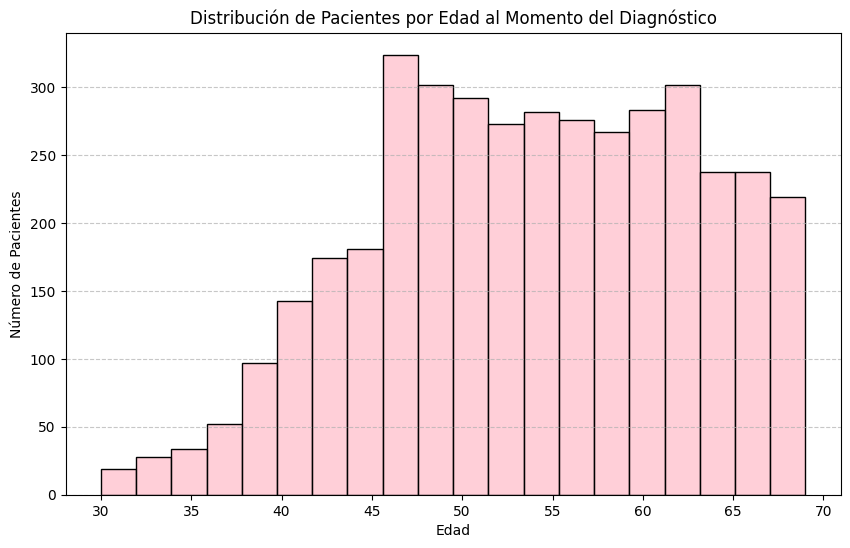

In [300]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x="age", bins=20, kde=False, color="pink")
plt.title("Distribución de Pacientes por Edad al Momento del Diagnóstico")
plt.xlabel("Edad")
plt.ylabel("Número de Pacientes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Introducción al Análisis de las Hipótesis

**Objetivo** 

Explorar cómo diferentes factores clínicos, demográficos y tumorales afectan la supervivencia en pacientes con cáncer de mama, utilizando las hipótesis planteadas.

**Herramientas de Análisis**
- Distribución y comparación de grupos:
    - Histogramas y gráficos de barras para explorar las variables demográficas.
    - Curvas de Kaplan-Meier para analizar la supervivencia en diferentes grupos.
- Pruebas estadísticas:
    - Log-rank test para comparar curvas de supervivencia.

### Resolviendo la Hipótesis 1

**Hipótesis**:  
*"El diagnóstico temprano mejora significativamente la supervivencia en pacientes con cáncer de mama."*

#### Para resolver esta hipótesis, consideraremos los siguientes aspectos clave:
1. **Edad del paciente al momento del diagnóstico**:  
   Determina si existe una relación entre la edad y la supervivencia en función del diagnóstico temprano o tardío.

2. **Meses de supervivencia**:  
   Analizaremos el tiempo de supervivencia tras el diagnóstico, observando si los diagnósticos tempranos muestran mejores resultados.

3. **Estado actual (Status)**:  
   Compararemos el estado de los pacientes (vivo/fallecido) para validar si el diagnóstico temprano tiene un impacto positivo en la supervivencia.


C:\Users\JUTHA\AppData\Local\Temp\ipykernel_22576\1773954255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')


Text(0, 0.5, 'Frecuencia')

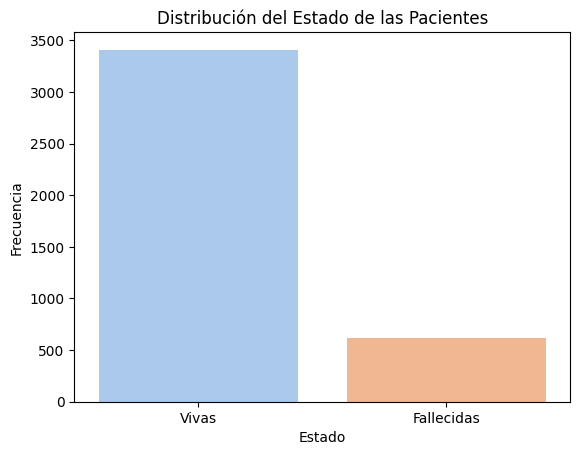

In [301]:
status_counts = df_final['status'].value_counts()
status_counts.index = status_counts.index.map({'Alive': 'Vivas', 'Dead': 'Fallecidas'})


sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')


plt.title('Distribución del Estado de las Pacientes')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')


El gráfico muestra la distribución del estado de las pacientes al momento del análisis. Se observa una gran mayoría de pacientes vivas (representadas en azul), en comparación con un menor número de pacientes fallecidas (en naranja). Esta distribución refleja que, dentro del dataset analizado, la mayoría de los casos tienen un desenlace favorable en términos de supervivencia.

Esto es consistente con la premisa de que los avances en diagnóstico y tratamiento han contribuido a aumentar la supervivencia en el cáncer de mama, especialmente en etapas tempranas.

El gráfico de cajas muestra la `distribución del tiempo de supervivencia (en meses)` según el estado de las pacientes (Vivas o Fallecidas).



C:\Users\JUTHA\AppData\Local\Temp\ipykernel_22576\3850388069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_final['survival_m'],


Text(0, 0.5, 'Tiempo de Supervivencia (meses)')

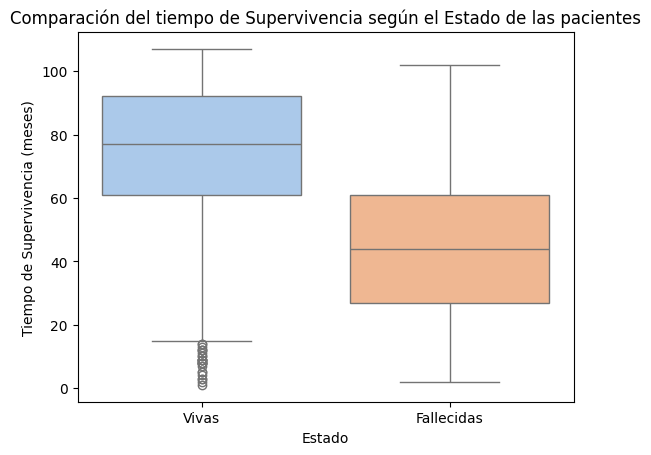

In [302]:
sns.boxplot(y=df_final['survival_m'],
             x=df_final['status'].map({'Alive': 'Vivas', 'Dead': 'Fallecidas'}),
             palette='pastel')
plt.title('Comparación del tiempo de Supervivencia según el Estado de las pacientes')
plt.xlabel('Estado')
plt.ylabel('Tiempo de Supervivencia (meses)')




- **Pacientes vivas:** Presentan un tiempo de supervivencia significativamente mayor, con una mediana cercana a los 80 meses.
- **Pacientes fallecidas**: Tienen una mediana de supervivencia considerablemente más baja, cerca de los 40 meses.
- **Variabilidad:** Se observa una menor variabilidad en el grupo de pacientes fallecidas, posiblemente indicando que estas suelen fallecer en un rango de tiempo más concentrado tras el diagnóstico.


Vamos a crear grafica de supervivencia Kaplan-Meier y analizar cómo varía la probabilidad de supervivencia en función del tiempo.

1. **Librerías Importadas**:
   - `KaplanMeierFitter` de la librería `lifelines`: Herramienta utilizada para realizar análisis de supervivencia basado en el método de Kaplan-Meier.
   - `matplotlib.pyplot`: Librería para la creación de gráficos.

2. **Definición de Datos**:
   - `time`: Columna extraída del DataFrame `df_final`, que contiene los meses de supervivencia de cada paciente (`survival_m`).
   - `event`: Transformación de la columna `status` para codificar el estado del paciente. 
     - Si el valor contiene `'Dead'`, se asigna un `1`, indicando un evento (fallecimiento).
     - De lo contrario, se asigna un `0`, indicando que el evento no ha ocurrido (vivo).



In [303]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


time = df_final['survival_m'] 
event = df_final['status'].apply(lambda x: 1 if 'Dead' in x else 0)


In [304]:
kmf = KaplanMeierFitter()


- `durations`: Tiempo de supervivencia de cada paciente, definido previamente como `time`.

- `event_observed`: Estado de cada paciente, donde `1` indica fallecimiento y `0` indica que el paciente sigue vivo.

- `label`: Etiqueta para identificar la curva en el gráfico, en este caso, "Supervivencia".



In [305]:
kmf.fit(durations=time, event_observed=event, label='Supervivencia Total')


<lifelines.KaplanMeierFitter:"Supervivencia Total", fitted with 4024 total observations, 3408 right-censored observations>

(0.0, 1.0)

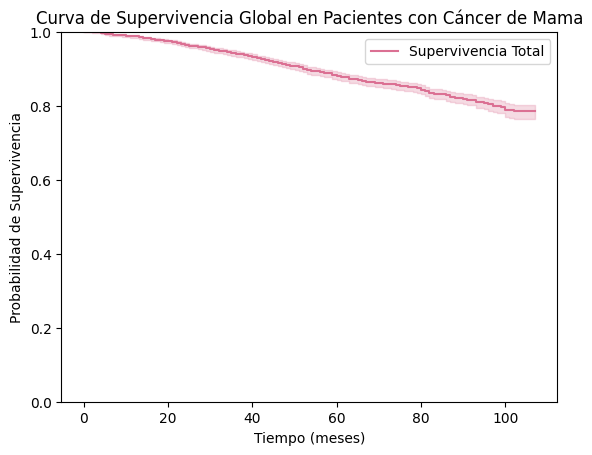

In [306]:
kmf.plot(color='palevioletred') 
plt.title('Curva de Supervivencia Global en Pacientes con Cáncer de Mama')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Probabilidad de Supervivencia')
plt.ylim(0,1.0)



# Interpretación de la Supervivencia Global

Observamos que la **supervivencia global** es alta. Ambas gráficas representan el mismo concepto: la supervivencia total de las pacientes diagnosticadas con cáncer de mama.

- **Gráfica de la izquierda**: La curva se encuentra muy arriba porque las curvas de supervivencia de Kaplan-Meier representan la probabilidad en un rango de 0 a 1. Esto indica que la mayoría de las pacientes diagnosticadas presentan altas probabilidades de supervivencia global.

- **Gráfica de la derecha**: A partir de esta gráfica ajustada, se aprecian más detalles:
  - Alrededor del **80% de las personas diagnosticadas** han alcanzado un tiempo de supervivencia de 100 meses.
  - Mientras que el **20% restante** presenta menores tiempos de supervivencia.

En las próximas diapositivas, las escalas de las gráficas estarán ajustadas a los valores de los datos, lo que permitirá visualizar de manera más precisa las diferencias y los detalles clave.


Text(0, 0.5, 'Probabilidad de Supervivencia')

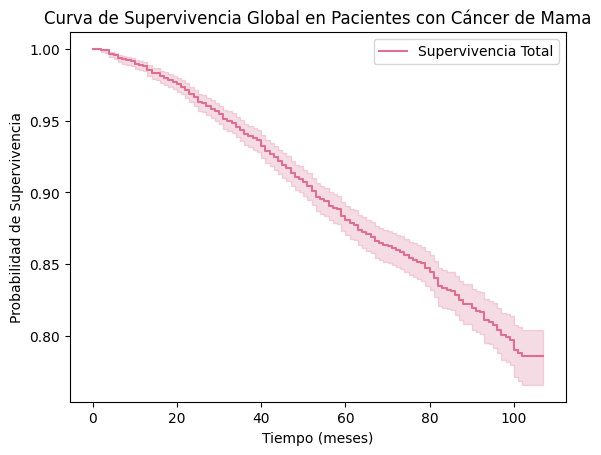

In [307]:
kmf.plot(color='palevioletred') 
plt.title('Curva de Supervivencia Global en Pacientes con Cáncer de Mama')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Probabilidad de Supervivencia')

Sin embargo, esta gráfica no responde directamente a mi pregunta, ya que agrupa a todas las pacientes, sin distinguir entre aquellas que recibieron un diagnóstico temprano y aquellas con diagnóstico tardío.

#### Agrupación de Pacientes por Estadio de Diagnóstico

##### Objetivo:
Clasificar a los pacientes en dos categorías:
- **Diagnóstico Temprano**: Incluye estadios iniciales.
- **Diagnóstico Avanzado**: Incluye estadios más avanzados.



In [308]:
df_final.head(2)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,e_status,p_status,reg_node_examined,reg_node_positive,survival_m,status
0,43,Other,Married,T2,N3,IIIC,Grade II,Regional,40.0,Positive,Positive,19,11,1,Alive
1,47,Other,Married,T2,N2,IIIA,Grade II,Regional,45.0,Positive,Positive,25,9,2,Alive


In [309]:
df_final[['t_stage','n_stage','6th_stage','grade','a_stage']]

,t_stage,n_stage,6th_stage,grade,a_stage
0,T2,N3,IIIC,Grade II,Regional
1,T2,N2,IIIA,Grade II,Regional
2,T2,N1,IIB,Grade III,Regional
3,T1,N1,IIA,Grade II,Regional
4,T2,N2,IIIA,Grade II,Regional
...,...,...,...,...,...
4019,T1,N1,IIA,Grade I,Regional
4020,T1,N2,IIIA,Grade III,Regional
4021,T1,N1,IIA,Grade II,Regional
4022,T1,N1,IIA,Grade II,Regional


In [310]:
df_final[['t_stage']].value_counts()

t_stage
T2         1786
T1         1603
T3          533
T4          102
Name: count, dtype: int64

In [311]:
df_final[['n_stage']].value_counts()

n_stage
N1         2732
N2          820
N3          472
Name: count, dtype: int64

In [312]:
df_final[['6th_stage']].value_counts()

6th_stage
IIA          1305
IIB          1130
IIIA         1050
IIIC          472
IIIB           67
Name: count, dtype: int64

In [313]:
df_final[['6th_stage']].value_counts().sum()

np.int64(4024)

In [314]:
df_final[['grade']].value_counts()

grade    
Grade II     2351
Grade III    1111
Grade I       543
Grade IV       19
Name: count, dtype: int64

In [315]:
df_final[['a_stage']].value_counts()

a_stage 
Regional    3932
Distant       92
Name: count, dtype: int64

Utilizar la variable **6th Stage** para asignar a cada paciente su categoría correspondiente:
- **Estadío Temprano**: 0, I, II.
- **Estadío Tardío**: III, IV.

La variable 6th Stage representa una síntesis actualizada del análisis clínico, basada en la clasificación "Sixth Edition of the AJCC Cancer Staging Manual". Esta variable condensa información clave al combinar datos cruciales, como el tamaño del tumor, la afectación de ganglios linfáticos y el grado histológico, proporcionando una visión integral del estadio del cáncer.

**Definición de etapas tempranas**:
   - Se crea una lista llamada `stages_tempranos` que contiene las categorías de **6th_stage** que corresponden a etapas tempranas:
     - `"IIA"`
     - `"IIB"`

Se genera un nuevo DataFrame llamado `diagnostico_temprano`, que incluye únicamente las filas donde el valor de la columna **6th_stage** coincide con alguno de los valores en `stages_tempranos`.  

In [316]:
stages_tempranos=["IIA","IIB"]
diagnostico_temprano=df_final[df_final['6th_stage'].isin(stages_tempranos)]
len(diagnostico_temprano)

2435

In [317]:
diagnostico_temprano['6th_stage'].value_counts()

6th_stage
IIA    1305
IIB    1130
Name: count, dtype: int64

**Definición de etapas tardías**:
   - Se crea una lista llamada `stages_tardios` que contiene las categorías de **6th_stage** que corresponden a etapas tardías:
     - `"IIIA"`
     - `"IIIB"`
     - `"IIIC"` 
     
Se genera un nuevo DataFrame llamado `diagnostico_tardio`, que incluye únicamente las filas donde el valor de la columna **6th_stage** coincide con alguno de los valores en `stages_tardio`. 

In [318]:
stages_tardios=["IIIA","IIIB","IIIC"]
diagnostico_tardio=df_final[df_final['6th_stage'].isin(stages_tardios)]
len(diagnostico_tardio)

1589

In [319]:
diagnostico_tardio['6th_stage'].value_counts()

6th_stage
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

Crear un gráfico de pastel para visualizar la distribución de la variable `6th_stage` en el DataFrame `df_final`. Este gráfico permite observar las proporciones de los diferentes estadios clínicos presentes en los datos.


Analizamos la distribución de los pacientes según la clasificación clínica descrita en la Sexta Edición del Manual de Estadificación del Cáncer de la AJCC. Como podemos observar, más del 60% de los pacientes se encuentran en las etapas IIA e IIB, lo que indica un diagnóstico en estadios aún tratables. Por otro lado, las etapas avanzadas como IIIC y IIIB presentan una proporción mucho menor, lo que podría estar relacionado con la efectividad de los programas de detección temprana. 

Este tipo de estadificación es crucial, ya que permite a los médicos diseñar estrategias de tratamiento más específicas y predecir con mayor precisión los resultados de los pacientes. En las próximas diapositivas exploraremos cómo estas etapas impactan en la supervivencia de los pacientes y su relación con otros factores determinantes."

Text(0.5, 1.0, "Distribución por 'Sixth Edition of the AJCC Cancer Staging Manual'")

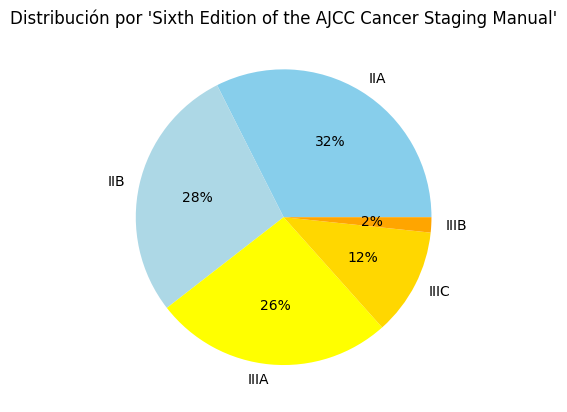

In [320]:
colores = ['skyblue', 'lightblue', 'yellow', 'gold', 'orange']

plt.pie(df_final["6th_stage"].value_counts(), labels=df_final['6th_stage'].value_counts().index, autopct="%1.0f%%", colors=colores);
plt.title("Distribución por 'Sixth Edition of the AJCC Cancer Staging Manual'")

Este gráfico compara la distribución de los estadios clínicos (`6th_stage`) entre pacientes con diagnóstico temprano y tardío. Permite observar diferencias en la frecuencia de los estadios entre los dos grupos.

Text(0.5, 0, 'Estadificación de la AJCC')

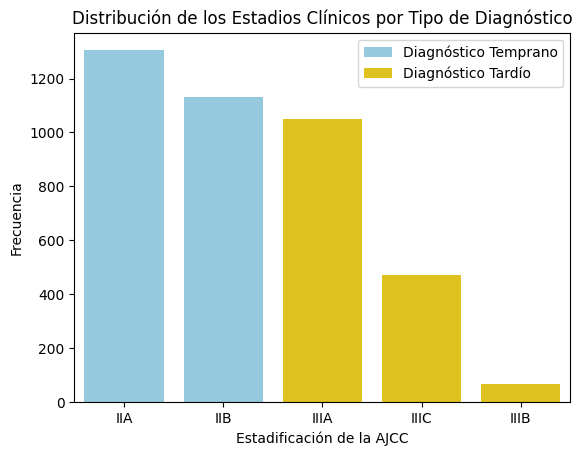

In [321]:
# Crear los gráficos de barras con etiquetas
sns.barplot(x=diagnostico_temprano['6th_stage'].value_counts().index, 
            y=diagnostico_temprano['6th_stage'].value_counts().values, 
            label='Diagnóstico Temprano',
            color='skyblue'
            )

sns.barplot(x=diagnostico_tardio['6th_stage'].value_counts().index, 
            y=diagnostico_tardio['6th_stage'].value_counts().values, 
            label='Diagnóstico Tardío',
            color='gold')

# Agregar la leyenda
plt.legend(loc='upper right')
plt.title('Distribución de los Estadios Clínicos por Tipo de Diagnóstico')
plt.ylabel('Frecuencia')
plt.xlabel('Estadificación de la AJCC')

En esta diapositiva, podemos observar cómo se distribuyen las pacientes en función del estadio clínico y del tipo de diagnóstico, ya sea temprano o tardío. Como pueden ver, en los diagnósticos tempranos, las etapas IIA e IIB representan la mayoría de los casos. Esto es un reflejo claro de cómo la detección precoz permite identificar el cáncer en estadios más manejables.

Por el contrario, los diagnósticos tardíos están más representados en etapas avanzadas como IIIC. Esto subraya la importancia de implementar programas efectivos de detección y educación para asegurar que las pacientes sean diagnosticadas lo antes posible, optimizando así las probabilidades de un tratamiento exitoso y mejores resultados en la supervivencia.

Haremos de una curva de supervivencia teniendo en cuenta estas dos nuevas clasificaciones: diagnóstico temprano y diagnóstico tardío.

In [322]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt



1. **Variables para Diagnóstico Temprano:**
   - `time_temprano`: Extrae la columna **survival_m** del DataFrame `diagnostico_temprano`, representando el tiempo de supervivencia en meses para pacientes diagnosticados en etapas tempranas.
   - `evento_temprano`: Genera una variable a partir de la columna **status** del DataFrame `diagnostico_temprano`. Utiliza una función `lambda` para asignar:
     - `1` si el estado es `'Dead'`.
     - `0` en caso contrario.

2. **Variables para Diagnóstico Tardío:**
   - `time_tardio`: Extrae la columna **survival_m** del DataFrame `diagnostico_tardio`, representando el tiempo de supervivencia en meses para pacientes diagnosticados en etapas tardías.
   - `evento_tardio`: Genera una variable a partir de la columna **status** del DataFrame `diagnostico_tardio`. Al igual que con `evento_temprano`, utiliza una función `lambda` para asignar:
     - `1` si el estado es `'Dead'`.
     - `0` en caso contrario.

In [323]:
time_temprano=diagnostico_temprano['survival_m']
evento_temprano=diagnostico_temprano['status'].apply(lambda x:1 if 'Dead' in x else 0)

time_tardio=diagnostico_tardio['survival_m']
evento_tardio=diagnostico_tardio['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [324]:
kmf_temprano = KaplanMeierFitter()
kmf_tardio = KaplanMeierFitter()

In [325]:
kmf_temprano.fit(durations=time_temprano, event_observed=evento_temprano, label='Diagnóstico temprano')
kmf_tardio.fit(durations=time_tardio, event_observed=evento_tardio, label='Diagnóstico tardío')

<lifelines.KaplanMeierFitter:"Diagnóstico tardío", fitted with 1589 total observations, 1204 right-censored observations>

Genera dos curvas de supervivencia Kaplan-Meier para pacientes diagnosticados en etapas tempranas y etapas tardías.
- El parámetro `ci_show=True` incluye las bandas de confianza (confidence intervals) alrededor de la curva, proporcionando una representación visual de la incertidumbre estadística.

Text(0, 0.5, 'Probabilidad de Supervivencia')

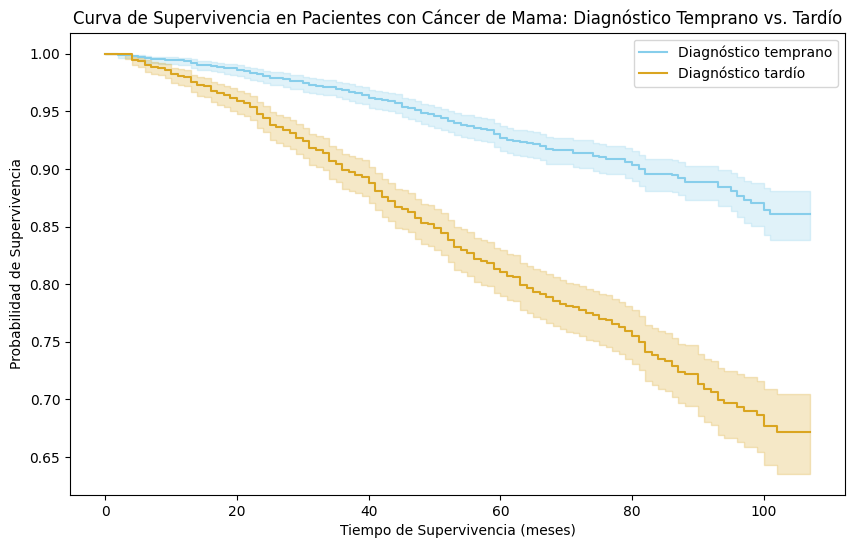

In [326]:
plt.figure(figsize=(10, 6))
kmf_temprano.plot(ci_show=True,color='skyblue')
kmf_tardio.plot(ci_show=True,color='goldenrod')

plt.title('Curva de Supervivencia en Pacientes con Cáncer de Mama: Diagnóstico Temprano vs. Tardío')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')



Observamos las curvas de Kaplan-Meier que comparan la supervivencia entre pacientes diagnosticadas de forma temprana y tardía. Como pueden notar, las pacientes con un diagnóstico temprano tienen una mayor probabilidad de supervivencia a lo largo del tiempo, reflejado en la curva superior.

Por otro lado, las pacientes diagnosticadas de forma tardía muestran una caída más pronunciada en la probabilidad de supervivencia. Esta diferencia, como indica el p-value igual a 0.000 del Log-Rank Test, es estadísticamente significativa. Esto refuerza la importancia de la detección precoz en mejorar los resultados clínicos y aumentar las posibilidades de supervivencia de las pacientes.

In [327]:
df_final[df_final['status']=='Dead'].value_counts().sum()

np.int64(616)

Función logrank_test:
- Evalúa si hay diferencias significativas en las curvas de supervivencia entre los dos grupos.
- Compara las distribuciones de supervivencia utilizando el estadístico de log-rank.

Resultados devueltos:
- test_statistic: El valor del estadístico de prueba, que mide la magnitud de la diferencia entre las curvas.
- p_value: Probabilidad asociada con el estadístico de prueba, que indica si la diferencia observada es estadísticamente significativa.

Resultado del test:

- Si `p_value < 0.05`:
    - Se concluye que hay diferencias estadísticamente significativas entre las curvas de supervivencia de los dos grupos.
    - Esto implica que las supervivencias de los grupos temprano y tardío son distintas.
- Si `p_value >= 0.05`:
    - No se encuentran diferencias significativas.
    - Esto indica que las curvas de supervivencia de los dos grupos no difieren considerablemente.

In [328]:
from lifelines.statistics import logrank_test

In [329]:
result = logrank_test(time_temprano, time_tardio, event_observed_A=evento_temprano, event_observed_B=evento_tardio)

In [330]:
print(f"Estadístico de log-rank: {result.test_statistic}")
print(f"p-valor: {result.p_value}")

if result.p_value < 0.05:
    print("Existen diferencias significativas entre las curvas de supervivencia.")
else:
    print("No se encuentran diferencias significativas entre las curvas de supervivencia.")

Estadístico de log-rank: 166.4090981222375
p-valor: 4.50301396758781e-38
Existen diferencias significativas entre las curvas de supervivencia.


Text(88.7565, 0.5600241818030978, 'p-value = 0.000 (Log-Rank Test)')

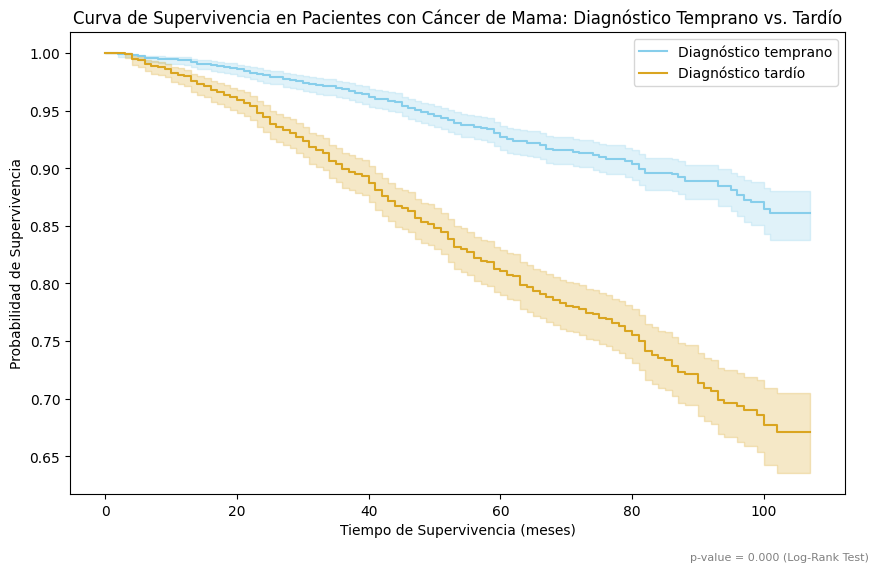

In [331]:
plt.figure(figsize=(10, 6))
kmf_temprano.plot(ci_show=True,color='skyblue')
kmf_tardio.plot(ci_show=True,color='goldenrod')

plt.title('Curva de Supervivencia en Pacientes con Cáncer de Mama: Diagnóstico Temprano vs. Tardío')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')
p_value_text = f"p-value = {result.p_value:.3f} (Log-Rank Test)"
plt.text(0.79 * plt.xlim()[1], 0.55 * plt.ylim()[1], p_value_text, fontsize=8, color='grey')

### Resolviendo la Hipótesis 2

**Hipótesis**:  
*"El tipo de prueba diagnóstica tiene un impacto significativo en la tasa de detección temprana."*

Si todas las pacientes en tu estudio recibieron las mismas pruebas diagnósticas, es difícil evaluar cómo el tipo de prueba afecta la tasa de detección temprana. Descarto la hipótesis y la reformulo:

**"Existen diferencias en la tasa de detección temprana por raza."** 

- Se filtra solo los diagnósticos tempranos.
- Se cuenta los diagnósticos tempranos por raza (groupby).
- Se cuenta el total de pacientes por raza (groupby).
- se calculan las proporciones dividiendo ambos conteos.


In [332]:
diagnostico_temprano = df_final[df_final['6th_stage'].isin(stages_tempranos)]


proporciones = (
    diagnostico_temprano.groupby('race').size() / df_final.groupby('race').size()
).reset_index(name='proporcion_deteccion_temprana')

(0.0, 1.0)

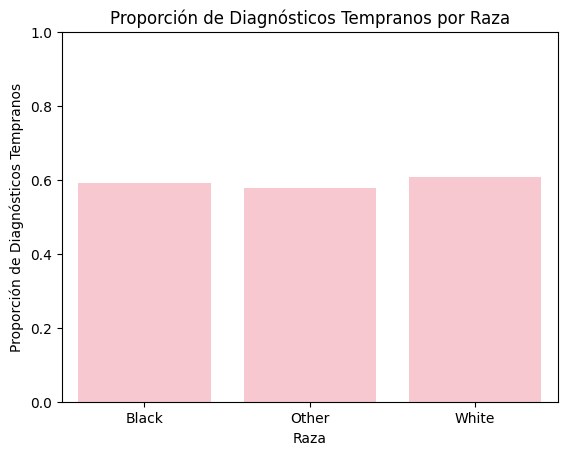

In [333]:

sns.barplot(x='race', y='proporcion_deteccion_temprana', data=proporciones, errorbar=None, color='pink')
plt.ylabel('Proporción de Diagnósticos Tempranos')
plt.xlabel('Raza')
plt.title('Proporción de Diagnósticos Tempranos por Raza')
plt.ylim(0,1)

En esta diapositiva, presentamos la proporción de diagnósticos tempranos por raza. Como pueden observar, las proporciones son bastante consistentes entre los tres grupos analizados: pacientes Black, White y Other. Aproximadamente el 60% de las pacientes en cada grupo fueron diagnosticadas de manera temprana.

Esto sugiere que, al menos en este conjunto de datos, no hay una disparidad significativa en la detección temprana entre los diferentes grupos raciales. Sin embargo, es importante tener en cuenta factores contextuales, como el acceso a servicios médicos y programas de detección precoz, para garantizar que esta equidad se mantenga y se refuerce en diferentes poblaciones.

### Resolviendo la Hipótesis 3

**Hipótesis**:  
*"La incidencia y la supervivencia del cáncer 
estáb influenciadas por factores demográficos como la raza."*

Text(0.5, 1.0, 'Distribución de pacientes por Raza')

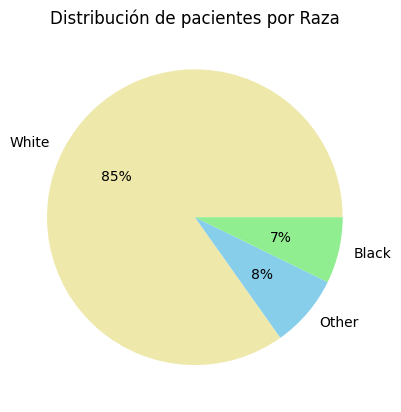

In [334]:
colores=['palegoldenrod','skyblue','lightgreen']

plt.pie(df_final["race"].value_counts(), labels=df_final['race'].value_counts().index, autopct="%1.0f%%", colors=colores);
plt.title("Distribución de pacientes por Raza")

Podemos observar la distribución de pacientes por raza dentro de nuestro dataset. Es evidente que una mayoría significativa, el 85%, pertenece al grupo racial 'White', mientras que los grupos 'Black' y 'Other' representan el 7% y el 8%, respectivamente.

Esto nos lleva a reflexionar sobre cómo la representatividad de diferentes grupos raciales puede influir en los resultados del estudio. Por ejemplo, podríamos preguntarnos si esta distribución refleja posibles desigualdades en el acceso a los servicios médicos, como el diagnóstico temprano, o diferencias en las características del cáncer entre estos grupos.

Es fundamental tener en cuenta estas diferencias al interpretar los datos para garantizar que las conclusiones sean inclusivas y representativas de todas las poblaciones. Esto también refuerza la importancia de fomentar estudios que incluyan mayor diversidad racial.

Creamos un grafico de **cajas boxplot** para ver la distribución del tiempo de supervivencia (en meses) según tres categorías raciales:

C:\Users\JUTHA\AppData\Local\Temp\ipykernel_22576\2694011243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_final['survival_m'], x=df_final['race'],palette=colores)


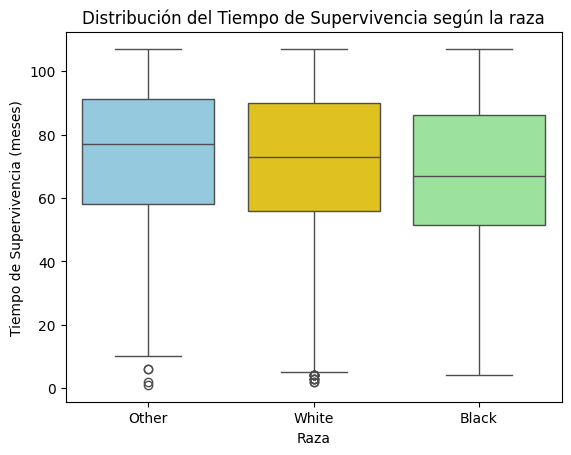

In [335]:
colores=['skyblue','gold','lightgreen']
sns.boxplot(y=df_final['survival_m'], x=df_final['race'],palette=colores)
# Personalizar la gráfica
plt.title('Distribución del Tiempo de Supervivencia según la raza')
plt.xlabel('Raza')
plt.ylabel('Tiempo de Supervivencia (meses)')
plt.grid(False)


En este gráfico, analizamos la distribución del tiempo de supervivencia según los diferentes grupos raciales. Podemos observar que las medianas de los grupos 'Other' y 'White' son bastante similares, rondando los 70 meses. Sin embargo, el grupo 'Black' muestra una mediana más baja, alrededor de los 60 meses.

No podemos ver muchas diferencias significativas, por lo que buscaremos otra aproximacion. Las medianas se agrupan entre los 80 y 70 meses, y todos los grupos tienen outliers en torno a los 20 meses de supervivencia.

Representaremos una curva de supervivencia de Kaplan meier para ver si existen diferencias entre grupos

A continuación, se describe el proceso para calcular y visualizar las curvas de supervivencia basadas en los diferentes grupos raciales utilizando el método de Kaplan-Meier.

 1. Filtrado de Datos por Raza
Primero, se segmenta el conjunto de datos en función de las categorías raciales.
2. Extracción de Tiempos de Supervivencia y Eventos
Para cada grupo racial, se extraen los datos de tiempo de supervivencia y el evento de muerte.
 3. Ajuste del Modelo Kaplan-Meier
Se ajustan los modelos Kaplan-Meier para cada grupo racial.
 4. Visualización de las Curvas de Supervivencia
Finalmente, se grafican las curvas de supervivencia para cada grupo racial.

In [336]:
race_white=["White"]
diagnostico_race_white=df_final[df_final['race'].isin(race_white)]
len(diagnostico_race_white)

3413

In [337]:
race_black=["Black"]
diagnostico_race_black=df_final[df_final['race'].isin(race_black)]
len(diagnostico_race_black)

291

In [338]:
race_other=["Other"]
diagnostico_race_other=df_final[df_final['race'].isin(race_other)]
len(diagnostico_race_other)

320

In [339]:
time_race_white=diagnostico_race_white['survival_m']
evento_race_white=diagnostico_race_white['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [340]:
time_race_black=diagnostico_race_black['survival_m']
evento_race_black=diagnostico_race_black['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [341]:
time_race_other=diagnostico_race_other['survival_m']
evento_race_other=diagnostico_race_other['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [342]:
kmf_race_white = KaplanMeierFitter()
kmf_race_black = KaplanMeierFitter()
kmf_race_other = KaplanMeierFitter()

In [343]:
kmf_race_white.fit(durations=time_race_white, event_observed=evento_race_white, label='White')
kmf_race_black.fit(durations=time_race_black, event_observed=evento_race_black, label='Black')
kmf_race_other.fit(durations=time_race_other, event_observed=evento_race_other, label='Other')

<lifelines.KaplanMeierFitter:"Other", fitted with 320 total observations, 287 right-censored observations>

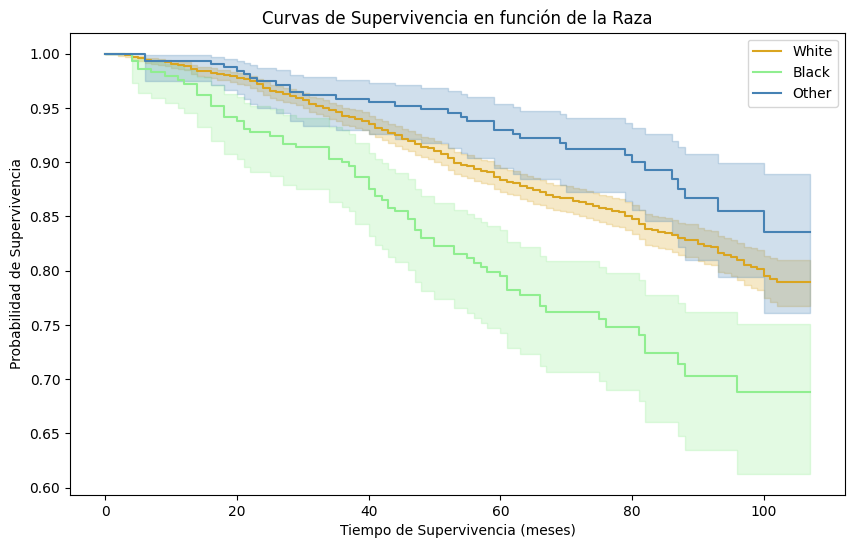

In [344]:
plt.figure(figsize=(10, 6))
kmf_race_white.plot(ci_show=True,color='goldenrod')
kmf_race_black.plot(ci_show=True,color='lightgreen')
kmf_race_other.plot(ci_show=True,color='steelblue')
# Personalizar la gráfica
plt.title('Curvas de Supervivencia en función de la Raza')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')

plt.legend()
plt.grid(False)


1. Realizar la prueba Log-Rank multivariada
- Determinar si hay diferencias significativas entre las curvas de supervivencia de todos los grupos considerados en conjunto.
- Evalua si las curvas de supervivencia son diferentes en general, sin identificar cuáles grupos son responsables de esas diferencias.
    Resultado esperado:
    - Si el valor p es significativo (p < 0.05), puedes concluir que hay diferencias entre las curvas y continuar con comparaciones por pares.
    - Si no es significativo (p ≥ 0.05), puedes concluir que no hay diferencias significativas entre las curvas y detener el análisis.
2. Realizar comparaciones por pares (Log-Rank Test)
Identificar específicamente cuáles grupos tienen diferencias significativas en sus curvas de supervivencia.
Qué evalúa: Las diferencias en las tasas de supervivencia entre cada par de grupos (por ejemplo, Black vs Other, Black vs White, etc.).
    Resultado esperado:
    - Para cada comparación, evalúa el valor p:
        - p < 0.05: Hay diferencias significativas entre las curvas de supervivencia de esos dos grupos.
        - p ≥ 0.05: No hay diferencias significativas entre esos dos grupos.

In [345]:
from lifelines.statistics import multivariate_logrank_test

# Prueba Log-Rank multivariada para comparar todas las curvas
result = multivariate_logrank_test(
    df_final['survival_m'],  # Columna con el tiempo hasta el evento
    df_final['race'],  # Columna con los grupos categóricos (Black, White, Other)
    df_final['status']   # Columna con el indicador del evento (1 = evento, 0 = censura)
)

# Mostrar resultados
print(result)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           8.93 0.01      6.44


In [346]:

# Comparaciones por pares
grupo_black = df_final[df_final['race'] == 'Black']
grupo_other = df_final[df_final['race'] == 'Other']
grupo_white = df_final[df_final['race'] == 'White']

# Comparar Black vs Other
result_black_other = logrank_test(
    grupo_black['survival_m'], grupo_other['survival_m'],
    event_observed_A=grupo_black['status'], event_observed_B=grupo_other['status']
)

# Comparar Black vs White
result_black_white = logrank_test(
    grupo_black['survival_m'], grupo_white['survival_m'],
    event_observed_A=grupo_black['status'], event_observed_B=grupo_white['status']
)

# Comparar Other vs White
result_other_white = logrank_test(
    grupo_other['survival_m'], grupo_white['survival_m'],
    event_observed_A=grupo_other['status'], event_observed_B=grupo_white['status']
)

# Mostrar resultados
print("Black vs Other:", result_black_other)
print("Black vs White:", result_black_white)
print("Other vs White:", result_other_white)

Black vs Other: <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           8.77 <0.005      8.35
Black vs White: <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.41 0.01      6.46
Other vs White: <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.81 0.18      2.48


Observamos si existen diferencias significativas entre la supervivencia de las diferentes razas

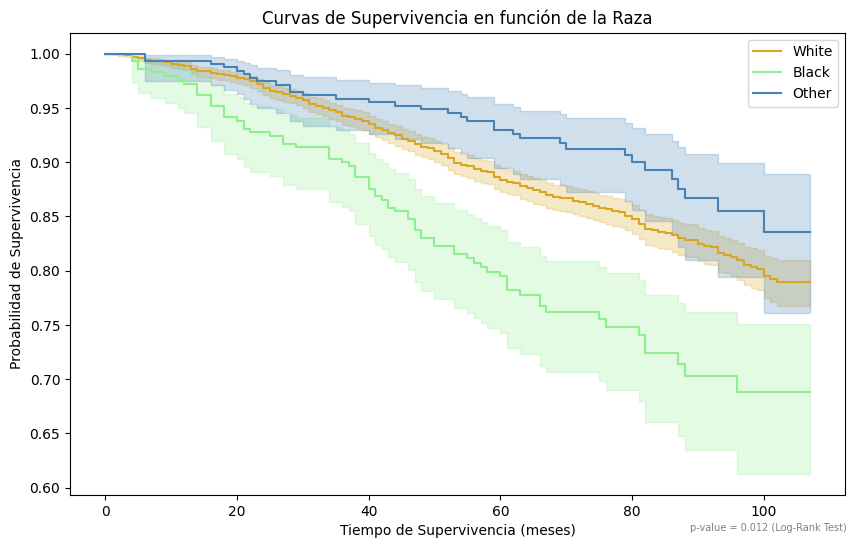

In [347]:
plt.figure(figsize=(10, 6))
kmf_race_white.plot(ci_show=True,color='goldenrod')
kmf_race_black.plot(ci_show=True,color='lightgreen')
kmf_race_other.plot(ci_show=True,color='steelblue')
# Personalizar la gráfica
plt.title('Curvas de Supervivencia en función de la Raza')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')

plt.legend()
plt.grid(False)
p_value_text = f"p-value = {result.p_value:.3f} (Log-Rank Test)"
plt.text(0.79 * plt.xlim()[1], 0.55 * plt.ylim()[1], p_value_text, fontsize=7, color='grey')
p_value_text = f"p-value = {result.p_value:.3f} (Log-Rank Test)"



La probabilidad de supervivencia varía significativamente entre los grupos, como lo indica el valor p del Log-Rank Test, que es 0.012, mostrando que estas diferencias no son producto del azar.

El grupo identificado como 'White' presenta la mejor probabilidad de supervivencia a lo largo del tiempo, mientras que el grupo 'Black' tiene la probabilidad más baja, con diferencias más marcadas a medida que aumenta el tiempo de seguimiento. El grupo 'Other' tiene un comportamiento intermedio.

Estos resultados pueden reflejar desigualdades en el acceso al diagnóstico temprano y los tratamientos, así como factores sociales y biológicos. Este tipo de análisis subraya la importancia de promover la igualdad en la atención médica y garantizar que todas las pacientes tengan acceso a recursos de diagnóstico y tratamiento de calidad.


### Resolviendo la Hipótesis 4

**Hipótesis**:  
*"El tamaño del tumor al momento del diagnóstico es un predictor clave de la supervivencia."*

In [348]:
df_final['t_stage'].unique()

array(['T2', 'T1', 'T3', 'T4'], dtype=object)

Queremos observar la distribución de pacientes según el tamaño del tumor, clasificado en las categorías T1 a T4. Para ello haremos un pie

(<matplotlib.legend.Legend at 0x145dfbb8410>,)

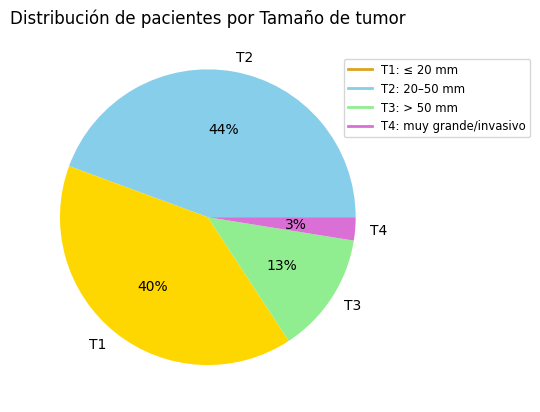

In [349]:
colores=['skyblue','gold','lightgreen','orchid']

plt.pie(df_final["t_stage"].value_counts(), labels=df_final['t_stage'].value_counts().index, autopct="%1.0f%%", colors=colores);
plt.title("Distribución de pacientes por Tamaño de tumor")
leyenda_labels = ['T1: ≤ 20 mm', 'T2: 20–50 mm', 'T3: > 50 mm', 'T4: muy grande/invasivo']
plt.legend( handles=[
        plt.Line2D([0], [0], color='goldenrod', lw=2, label='T1: ≤ 20 mm'),
        plt.Line2D([0], [0], color='skyblue', lw=2, label='T2: 20–50 mm'),
        plt.Line2D([0], [0], color='lightgreen', lw=2, label='T3: > 50 mm'),
        plt.Line2D([0], [0], color='orchid', lw=2, label='T4: muy grande/invasivo')
    ],
           labels=leyenda_labels, loc='lower right',  
    bbox_to_anchor=(1.388, 0.7),fontsize='small'),  

- El 44% de los pacientes presentan tumores T2, lo que indica que son de tamaño mediano al momento del diagnóstico, siendo la categoría más frecuente. 
- Por otro lado, un 40% de los casos son T1, es decir, tumores pequeños, lo que podría sugerir un diagnóstico más temprano en estos pacientes.
- Las categorías T3 y T4, correspondientes a tumores más grandes, representan un 13% y 3%, respectivamente, lo que refuerza la importancia de la detección oportuna.

Estos datos son esenciales para enfocar estrategias de diagnóstico y tratamiento, priorizando la detección temprana para reducir la progresión a estadios más avanzados. 


Aquí haremos un gráfico que relaciona dos variables importantes: **la edad de las pacientes y el tamaño de los tumores.** 

Text(37.722222222222214, 0.5, 'Tamaño del tumor (mm)')

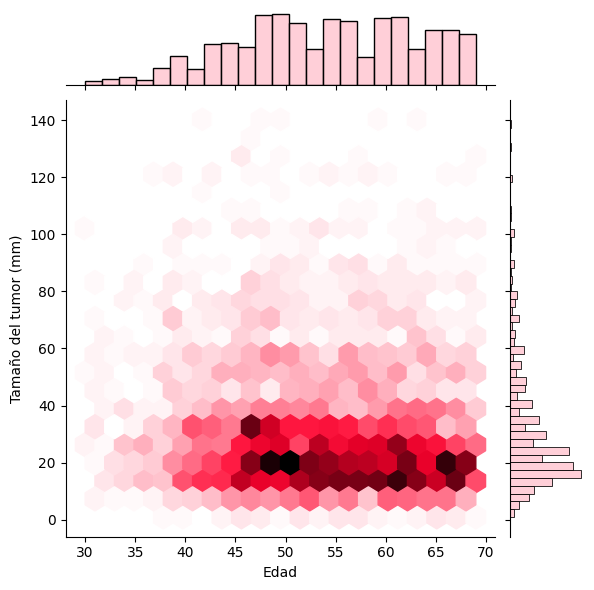

In [350]:
sns.jointplot(data=df_final, x='age', y='tumor_size', kind= "hex", color="pink",  gridsize=20)

plt.xlabel('Edad')
plt.ylabel('Tamaño del tumor (mm)')

La intensidad de color en la gráfica hexagonal nos muestra que la mayoría de los tumores, con tamaños entre 20 y 40 mm, están concentrados en pacientes de entre 50 y 60 años. 

Si observamos los histogramas, podemos confirmar que la distribución de las edades está sesgada hacia mujeres en edades perimenopáusicas y posmenopáusicas, mientras que los tamaños más grandes de tumor son menos frecuentes en general.

Estos datos sugieren la necesidad de centrarnos en estrategias de detección temprana, especialmente en este rango de edad (mujeres perimenopáusicas y postmenopáusicas), dado que tumores más pequeños podrían estar asociados con mejores resultados clínicos.

Seguidamente, podríamos analizar la relación entre estas categorías y la supervivencia, para confirmar que tamaños más pequeños están asociados con mejores resultados clínicos. Para ello utilizaremos un boxplot.

C:\Users\JUTHA\AppData\Local\Temp\ipykernel_22576\987333592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_final['survival_m'], x=df_final['t_stage'],palette=colores)


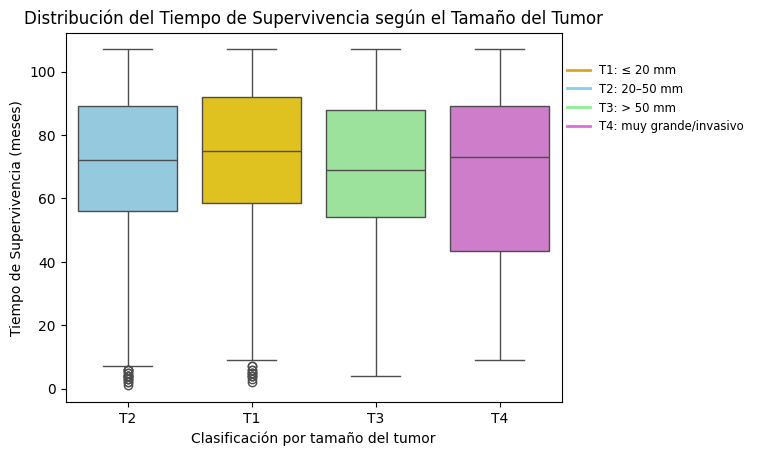

In [351]:
colores=['skyblue','gold','lightgreen','orchid']
sns.boxplot(y=df_final['survival_m'], x=df_final['t_stage'],palette=colores)

plt.title('Distribución del Tiempo de Supervivencia según el Tamaño del Tumor')
plt.xlabel('Clasificación por tamaño del tumor')
plt.ylabel('Tiempo de Supervivencia (meses)')
plt.grid(False)
leyenda_labels = ['T1: ≤ 20 mm', 'T2: 20–50 mm', 'T3: > 50 mm', 'T4: muy grande/invasivo']
plt.legend( handles=[
        plt.Line2D([0], [0], color='goldenrod', lw=2, label='T1: ≤ 20 mm'),
        plt.Line2D([0], [0], color='skyblue', lw=2, label='T2: 20–50 mm'),
        plt.Line2D([0], [0], color='lightgreen', lw=2, label='T3: > 50 mm'),
        plt.Line2D([0], [0], color='orchid', lw=2, label='T4: muy grande/invasivo')
    ],
           labels=leyenda_labels, loc='lower right',  
    bbox_to_anchor=(1.388, 0.7),  
    frameon=False,
    fontsize='small',  
    title_fontsize='medium')  



Con este gráfico analizamos la relación entre el tamaño del tumor y el tiempo de supervivencia. El eje horizontal clasifica los tumores según su tamaño: desde los más pequeños (T1) hasta los muy grandes o invasivos (T4). Podemos observar que los pacientes con tumores clasificados como T1, T2 y T3 tienen medianas de supervivencia bastante similares, lo que indica que, en estas etapas, el tamaño del tumor no parece ser un factor diferenciador crítico. Sin embargo, el grupo T4 presenta una mediana de supervivencia significativamente menor, con mayor variabilidad en los tiempos de supervivencia, lo que resalta la agresividad de estos tumores. Estos hallazgos refuerzan la importancia de una detección temprana, ya que tumores más pequeños podrían estar asociados con mejores resultados clínicos. También destaca la necesidad de estrategias terapéuticas específicas para los pacientes con tumores más avanzados." 

Como hasta ahora hemos estado haciendo, vamos a comparar los tamaños con la supervivencia de las pacientes para poder contestar a la 4 hipotesis. Para ello realizaremos una curva de supervivncia de **Kaplan meier** y observaremos si existen diferencias entre las curvas 

A continuación, se describe el proceso para calcular y visualizar las curvas de supervivencia basadas en los diferentes` Tamaños del tumor`cuya variable es `t_stage` utilizando el método de Kaplan-Meier.

 1. Filtrado de Datos por Tamaño:
Primero, se segmenta el conjunto de datos en función de los tamaños (T1, T2, T3, T4).
2. Extracción de Tiempos de Supervivencia y Eventos
Para cada grupo racial, se extraen los datos de tiempo de supervivencia y el evento de muerte.
 3. Ajuste del Modelo Kaplan-Meier
Se ajustan los modelos Kaplan-Meier para cada tamaño.
 4. Visualización de las Curvas de Supervivencia
Finalmente, se grafican las curvas de supervivencia para Tamaño.

In [352]:
size_t_1=["T1"]
diagnostico_size_t_1=df_final[df_final['t_stage'].isin(size_t_1)]
len(diagnostico_size_t_1)

1603

In [353]:
size_t_2=["T2"]
diagnostico_size_t_2=df_final[df_final['t_stage'].isin(size_t_2)]
len(diagnostico_size_t_2)

1786

In [354]:
size_t_3=["T3"]
diagnostico_size_t_3=df_final[df_final['t_stage'].isin(size_t_3)]
len(diagnostico_size_t_3)

533

In [355]:
size_t_4=["T4"]
diagnostico_size_t_4=df_final[df_final['t_stage'].isin(size_t_4)]
len(diagnostico_size_t_4)

102

In [356]:
time_size_t_1=diagnostico_size_t_1['survival_m']
evento_size_t_1=diagnostico_size_t_1['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [357]:
time_size_t_2=diagnostico_size_t_2['survival_m']
evento_size_t_2=diagnostico_size_t_2['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [358]:
time_size_t_3=diagnostico_size_t_3['survival_m']
evento_size_t_3=diagnostico_size_t_3['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [359]:
time_size_t_4=diagnostico_size_t_4['survival_m']
evento_size_t_4=diagnostico_size_t_4['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [360]:
kmf_size_t_1 = KaplanMeierFitter()
kmf_size_t_2 = KaplanMeierFitter()
kmf_size_t_3 = KaplanMeierFitter()
kmf_size_t_4 = KaplanMeierFitter()

In [361]:
kmf_size_t_1.fit(durations=time_size_t_1, event_observed=evento_size_t_1, label='T1: ≤ 20 mm')
kmf_size_t_2.fit(durations=time_size_t_2, event_observed=evento_size_t_2, label='T2: 20–50 mm')
kmf_size_t_3.fit(durations=time_size_t_3, event_observed=evento_size_t_3, label='T3: > 50 mm')
kmf_size_t_4.fit(durations=time_size_t_4, event_observed=evento_size_t_4, label='T4: muy grande/invasivo')
### tumor de cualquier tamaño pero afectacion directa a pared toracica, piel, cancer inflamatorio, ulceras etc

<lifelines.KaplanMeierFitter:"T4: muy grande/invasivo", fitted with 102 total observations, 62 right-censored observations>

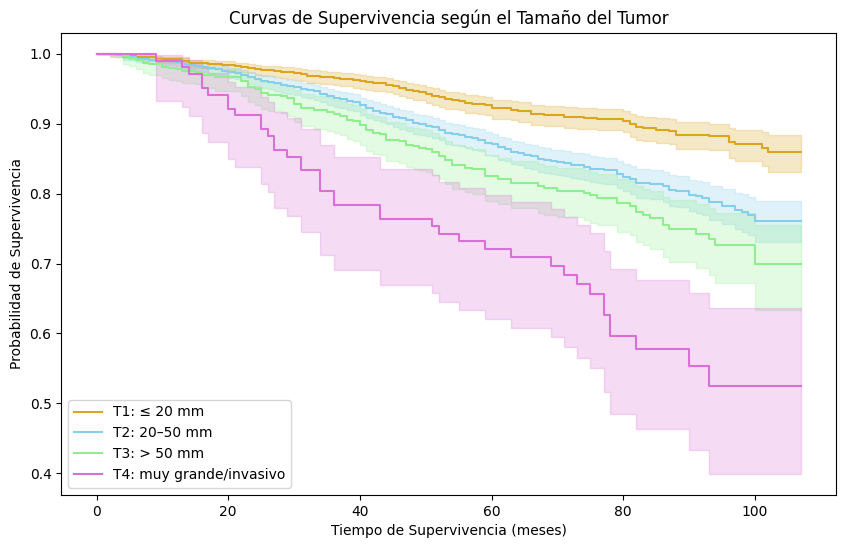

In [362]:
plt.figure(figsize=(10, 6))
kmf_size_t_1.plot(ci_show=True,color='goldenrod')
kmf_size_t_2.plot(ci_show=True,color='skyblue')
kmf_size_t_3.plot(ci_show=True,color='lightgreen')
kmf_size_t_4.plot(ci_show=True,color='orchid')

plt.title('Curvas de Supervivencia según el Tamaño del Tumor')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.grid(False)
plt.show()

Comprobamos si existen diferencias significativas entre ellos, utilizamos el **Log-Rank multivariada** para compara todas las curvas.

In [363]:
from lifelines.statistics import multivariate_logrank_test

# Prueba Log-Rank multivariada para comparar todas las curvas
result = multivariate_logrank_test(
    df_final['survival_m'],  
    df_final['t_stage'],  
    df_final['status']   
)


print(result)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          13.64 <0.005      8.19


Como el p value es menor de 0.005 quiere decir que existe al menos una diferencia estadisticamente significativa entre las curvas. A continuación seguiremos el análisis on Log rank test, comparando las variables dos a dos.

In [364]:
from lifelines.statistics import logrank_test

# Separar los datos por t_stage
grupo_t1 = df_final[df_final['t_stage'] == 'T1']
grupo_t2 = df_final[df_final['t_stage'] == 'T2']
grupo_t3 = df_final[df_final['t_stage'] == 'T3']
grupo_t4 = df_final[df_final['t_stage'] == 'T4']

# Comparar T1 vs T2
result_t1_t2 = logrank_test(
    grupo_t1['survival_m'], grupo_t2['survival_m'],
    event_observed_A=grupo_t1['status'], event_observed_B=grupo_t2['status']
)

# Comparar T1 vs T3
result_t1_t3 = logrank_test(
    grupo_t1['survival_m'], grupo_t3['survival_m'],
    event_observed_A=grupo_t1['status'], event_observed_B=grupo_t3['status']
)

# Comparar T1 vs T4
result_t1_t4 = logrank_test(
    grupo_t1['survival_m'], grupo_t4['survival_m'],
    event_observed_A=grupo_t1['status'], event_observed_B=grupo_t4['status']
)

# Comparar T2 vs T3
result_t2_t3 = logrank_test(
    grupo_t2['survival_m'], grupo_t3['survival_m'],
    event_observed_A=grupo_t2['status'], event_observed_B=grupo_t3['status']
)

# Comparar T2 vs T4
result_t2_t4 = logrank_test(
    grupo_t2['survival_m'], grupo_t4['survival_m'],
    event_observed_A=grupo_t2['status'], event_observed_B=grupo_t4['status']
)

# Comparar T3 vs T4
result_t3_t4 = logrank_test(
    grupo_t3['survival_m'], grupo_t4['survival_m'],
    event_observed_A=grupo_t3['status'], event_observed_B=grupo_t4['status']
)

# Mostrar resultados con p-values y estadísticos
print("T1 vs T2:", f"p-value = {result_t1_t2.p_value:.3f}, test_statistic = {result_t1_t2.test_statistic:.3f}")
print("T1 vs T3:", f"p-value = {result_t1_t3.p_value:.3f}, test_statistic = {result_t1_t3.test_statistic:.3f}")
print("T1 vs T4:", f"p-value = {result_t1_t4.p_value:.3f}, test_statistic = {result_t1_t4.test_statistic:.3f}")
print("T2 vs T3:", f"p-value = {result_t2_t3.p_value:.3f}, test_statistic = {result_t2_t3.test_statistic:.3f}")
print("T2 vs T4:", f"p-value = {result_t2_t4.p_value:.3f}, test_statistic = {result_t2_t4.test_statistic:.3f}")
print("T3 vs T4:", f"p-value = {result_t3_t4.p_value:.3f}, test_statistic = {result_t3_t4.test_statistic:.3f}")


T1 vs T2: p-value = 0.007, test_statistic = 7.304
T1 vs T3: p-value = 0.002, test_statistic = 10.048
T1 vs T4: p-value = 0.088, test_statistic = 2.914
T2 vs T3: p-value = 0.199, test_statistic = 1.648
T2 vs T4: p-value = 0.455, test_statistic = 0.558
T3 vs T4: p-value = 0.921, test_statistic = 0.010


Text(106.73249999999999, 0.2575076535359937, 'p-value = 0.003 (Log-Rank Test)')

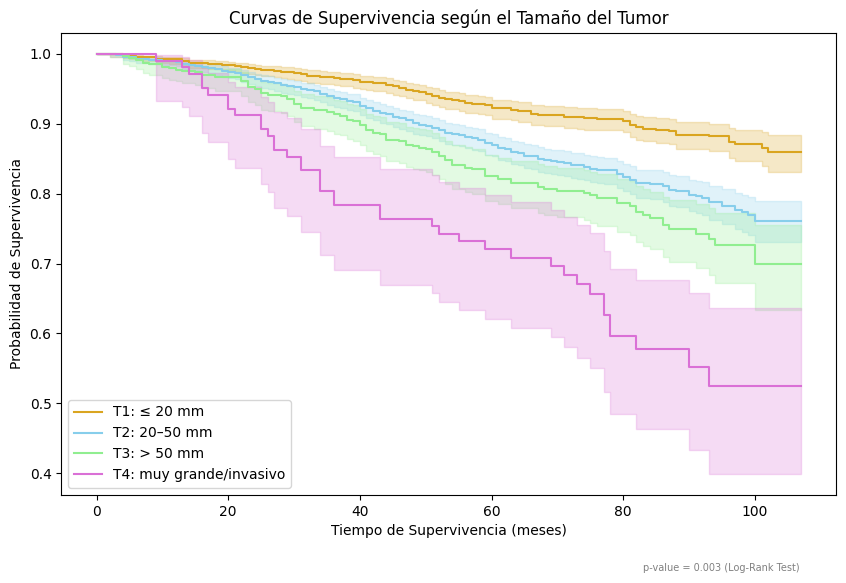

In [365]:
plt.figure(figsize=(10, 6))
kmf_size_t_1.plot(ci_show=True,color='goldenrod')
kmf_size_t_2.plot(ci_show=True,color='skyblue')
kmf_size_t_3.plot(ci_show=True,color='lightgreen')
kmf_size_t_4.plot(ci_show=True,color='orchid')
# Personalizar la gráfica
plt.title('Curvas de Supervivencia según el Tamaño del Tumor')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.grid(False)


p_value_text = f"p-value = {result.p_value:.3f} (Log-Rank Test)"
plt.text(
    0.95 * plt.xlim()[1],  
    0.25 * plt.ylim()[1],  
    p_value_text,
    fontsize=7,
    color='grey',
    horizontalalignment='right', 
    verticalalignment='bottom'  
)




En esta gráfica observamos las curvas de supervivencia según el tamaño del tumor. Como vemos, los tumores clasificados como T1 y T2 tienen una mayor probabilidad de supervivencia a lo largo del tiempo, mientras que los tumores más grandes, especialmente los T4, presentan peores resultados. Esto sugiere que el tamaño del tumor al momento del diagnóstico es un factor determinante en la supervivencia.

Además, el análisis estadístico con un p-value de 0.003 confirma que estas diferencias son significativas. Esto refuerza la necesidad de implementar estrategias de detección temprana que permitan identificar tumores más pequeños, lo cual podría mejorar significativamente los resultados clínicos en esta población.


### Resolviendo la Hipótesis 5

**Hipótesis**:  
*"El estatus hormonal (ER+/PR+) afecta la supervivencia y la mortalidad en pacientes con cáncer de mama."*

In [366]:
df_final['e_status'].value_counts()

e_status
Positive    3755
Negative     269
Name: count, dtype: int64

In [367]:
df_final['p_status'].value_counts()

p_status
Positive    3326
Negative     698
Name: count, dtype: int64

In [368]:
df_final['p_status'].isnull().sum()

np.int64(0)

In [369]:
df_final['e_status'].isnull().sum()

np.int64(0)

Voy a crear una nueva columna utilizando la función `np.where` para definir cada una de las **4 nuevas categorías**, en función del valor de las variables existentes `e_status` y `p_status`.
Esta columna clasifica cada fila en función de los valores de las columnas existentes e_status y p_status.






In [370]:
df_final['status_hormonal']=np.where(
    (df_final['e_status']=='Positive') & (df_final['p_status']=='Negative'), 'E +',
        np.where(
            (df_final['e_status']=='Negative') & (df_final['p_status']=='Positive'), 'P +',
            np.where(
                (df_final['e_status']=='Positive') & (df_final['p_status']=='Positive'), '+ +',
                np.where(
                    (df_final['e_status']=='Negative') & (df_final['p_status']=='Negative'), '- -',
                    'sin clasificar'
                    )
                )
            )
        )           

Ya tenemos la nueva columna con los valores de doble positvos y doble negativos que son importantes para la decisión a la hora de elegir tratamiento.

In [371]:
print(df_final.columns)
print(df_final['status_hormonal'].unique())

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'grade', 'a_stage', 'tumor_size', 'e_status', 'p_status',
       'reg_node_examined', 'reg_node_positive', 'survival_m', 'status',
       'status_hormonal'],
      dtype='object')
['+ +' 'E +' '- -' 'P +']


In [372]:
df_final['status_hormonal'].value_counts()

status_hormonal
+ +    3299
E +     456
- -     242
P +      27
Name: count, dtype: int64

 Realizamos un **gráfico de pastel** que muestre la distribución de pacientes según la expresión de los receptores hormonales para estrógeno (E) y progesterona (P).

Text(0.5, 1.0, 'Distribución de pacientes por Expresión de Receptores Hormonales')

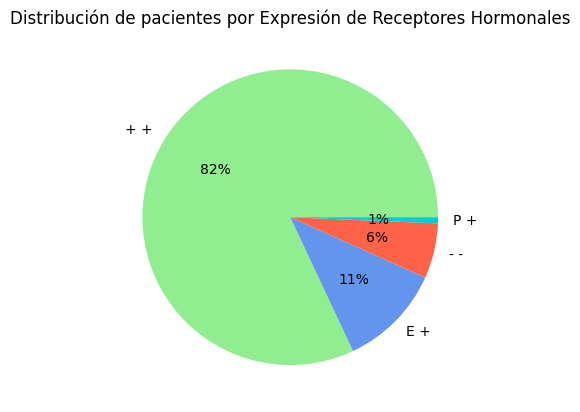

In [373]:
colores=['lightgreen','cornflowerblue','tomato','darkturquoise']

plt.pie(df_final["status_hormonal"].value_counts(), labels=df_final['status_hormonal'].value_counts().index, autopct="%1.0f%%", colors=colores);
plt.title("Distribución de pacientes por Expresión de Receptores Hormonales")

La mayoría de las pacientes (82%) tienen expresión positiva de ambos receptores hormonales (E+ y P+), lo que está asociado con un mejor pronóstico clínico y mayores opciones terapéuticas.

Representa la proporción de pacientes en cada categoría de status_hormonal, basada en la expresión de receptores hormonales de estrógeno (e_status) y progesterona (p_status).

C:\Users\JUTHA\AppData\Local\Temp\ipykernel_22576\50476354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_final['survival_m'], x=df_final['status_hormonal'],palette=colores)


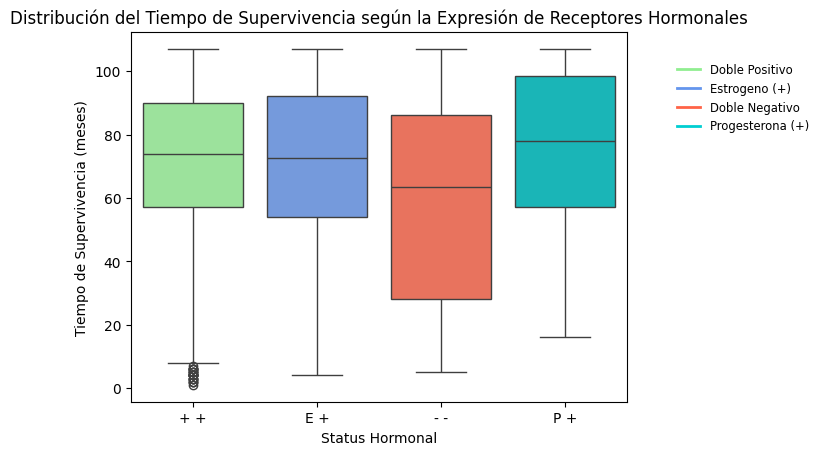

In [374]:
colores=['lightgreen','cornflowerblue','tomato','darkturquoise']
sns.boxplot(y=df_final['survival_m'], x=df_final['status_hormonal'],palette=colores)
# Personalizar la gráfica
plt.title('Distribución del Tiempo de Supervivencia según la Expresión de Receptores Hormonales')
plt.xlabel('Status Hormonal')
plt.ylabel('Tiempo de Supervivencia (meses)')
plt.grid(False)
leyenda_labels = ['Doble Positivo', 'Estrogeno (+)', 'Doble Negativo', 'Progesterona (+)']
plt.legend( handles=[
        plt.Line2D([0], [0], color='lightgreen', lw=2, label='Doble Positivo'),
        plt.Line2D([0], [0], color='cornflowerblue', lw=2, label='Estrogeno (+)'),
        plt.Line2D([0], [0], color='tomato', lw=2, label='Doble --'),
        plt.Line2D([0], [0], color='darkturquoise', lw=2, label='Progesterona (+)')
    ],
           labels=leyenda_labels, loc='lower right',  # Ubicación relativa dentro del gráfico
    bbox_to_anchor=(1.388, 0.7),  # Ajusta la posición: (x, y)
    frameon=False,
    fontsize='small',  # Tamaño de la fuente más pequeño
    title_fontsize='medium')  # Sin marco)

La expresión de los receptores hormonales afecta el tiempo de supervivencia de las pacientes:

- Las pacientes con expresión doble positiva (`ER+ y PR+`) muestran el mejor pronóstico, lo que refleja la eficacia de la terapia hormonal en este grupo.
- Por otro lado, las pacientes doble negativas (`ER- y PR-`), que suelen incluir el subtipo triple negativo, tienen una supervivencia significativamente menor, lo que subraya la agresividad de este tipo de tumor y la necesidad de tratamientos más efectivos.
- Finalmente, los subtipos con un solo receptor positivo (`E+` o `P+`) tienen resultados intermedios.

Esto refuerza la importancia de clasificar a las pacientes según su perfil hormonal para definir estrategias terapéuticas personalizadas y mejorar los resultados clínicos.

Para profundizar en la relación entre la expresión de receptores hormonales y la supervivencia, construiremos **curvas de supervivencia Kaplan-Meier** para cada una de las categorías de `status_hormonal`. Este análisis nos permitirá:

1. Visualizar las diferencias en la probabilidad de supervivencia a lo largo del tiempo.
2. Comparar las curvas entre los grupos y evaluar estadísticamente si estas diferencias son significativas.

In [375]:
doble_positivo=["+ +"]
resultado_doble_positivo=df_final[df_final['status_hormonal'].isin(doble_positivo)]
len(resultado_doble_positivo)

3299

In [376]:
doble_negativo=["- -"]
resultado_doble_negativo=df_final[df_final['status_hormonal'].isin(doble_negativo)]
len(resultado_doble_negativo)

242

In [377]:
estrogeno_positivo=["E +"]
resultado_estrogeno_positivo=df_final[df_final['status_hormonal'].isin(estrogeno_positivo)]
len(resultado_estrogeno_positivo)

456

In [378]:
progesterona_positivo=["P +"]
resultado_progesterona_positivo=df_final[df_final['status_hormonal'].isin(progesterona_positivo)]
len(resultado_progesterona_positivo)

27

In [379]:
time_doble_positivo=resultado_doble_positivo['survival_m']
evento_doble_positivo=resultado_doble_positivo['status'].apply(lambda x:1 if 'Dead' in x else 0)

time_doble_negativo=resultado_doble_negativo['survival_m']
evento_doble_negativo=resultado_doble_negativo['status'].apply(lambda x:1 if 'Dead' in x else 0)

time_estrogeno_positivo=resultado_estrogeno_positivo['survival_m']
evento_estrogeno_positivo=resultado_estrogeno_positivo['status'].apply(lambda x:1 if 'Dead' in x else 0)

time_progesterona_positivo=resultado_progesterona_positivo['survival_m']
evento_progesterona_positivo=resultado_progesterona_positivo['status'].apply(lambda x:1 if 'Dead' in x else 0)

In [380]:
kmf_doble_positivo = KaplanMeierFitter()
kmf_doble_negativo= KaplanMeierFitter()
kmf_estrogeno_positivo = KaplanMeierFitter()
kmf_progesterona_positivo = KaplanMeierFitter()

In [381]:
kmf_doble_positivo.fit(durations=time_doble_positivo, event_observed=evento_doble_positivo, label='+ +')
kmf_doble_negativo.fit(durations=time_doble_negativo, event_observed=evento_doble_negativo, label='- -')
kmf_estrogeno_positivo.fit(durations=time_estrogeno_positivo, event_observed=evento_estrogeno_positivo, label='E (+)')
kmf_progesterona_positivo.fit(durations=time_progesterona_positivo, event_observed=evento_progesterona_positivo, label='P (+)')

<lifelines.KaplanMeierFitter:"P (+)", fitted with 27 total observations, 21 right-censored observations>

Text(106.73249999999999, 0.35956516501219987, 'p-value = 0.003 (Log-Rank Test)')

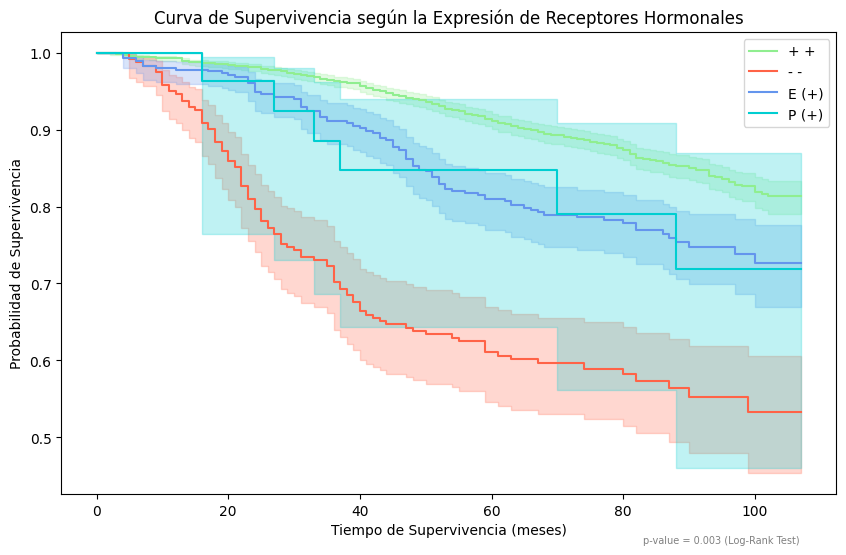

In [382]:
plt.figure(figsize=(10, 6))
kmf_doble_positivo.plot(ci_show=True,color='lightgreen')
kmf_doble_negativo.plot(ci_show=True,color='tomato')
kmf_estrogeno_positivo.plot(ci_show=True,color='cornflowerblue')
kmf_progesterona_positivo.plot(ci_show=True,color='darkturquoise')
# Personalizar la gráfica
plt.title('Curva de Supervivencia según la Expresión de Receptores Hormonales')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')

plt.legend()
plt.grid(False)
p_value_text = f"p-value = {result.p_value:.3f} (Log-Rank Test)"
plt.text(
    0.95 * plt.xlim()[1],  # Posición en el eje X (95% del límite superior del X)
    0.35 * plt.ylim()[1],  # Posición en el eje Y (5% del límite superior del Y)
    p_value_text,
    fontsize=7,
    color='grey',
    horizontalalignment='right',  # Alinear el texto a la derecha
    verticalalignment='bottom')   # Alinear el texto en la parte inferior

En pasos anteriores, exploramos cómo la expresión de receptores hormonales afecta la supervivencia en pacientes. Primero, analizamos la distribución de pacientes por categorías hormonales (`status_hormonal`) y evaluamos las diferencias en el tiempo de supervivencia utilizando gráficos de distribución y boxplots. Esto mostró que:

1. El grupo **Doble Positivo (+ +)** es el más prevalente y tiene la mejor mediana de supervivencia.
2. El grupo **Doble Negativo (- -)** tiene el peor pronóstico con menor mediana de supervivencia.


 **Análisis por Comparaciones por Pares**
 
Se realizaron comparaciones por pares entre las categorías hormonales usando el **Log-Rank Test**. Este análisis permitió identificar diferencias significativas entre algunas combinaciones, como:
- **Doble Positivo (+ +) vs Doble Negativo (- -):** Indicó diferencias significativas en la supervivencia.
- **Doble Positivo (+ +) vs Estrógeno positivo (E +):** También mostró diferencias estadísticamente relevantes.

Sin embargo, las comparaciones por pares no proporcionan una visión conjunta de todas las categorías.


**Próximo Paso: Log-Rank Multivariado**

Para analizar de manera simultánea todas las categorías de `status_hormonal`, realizaremos un **Log-Rank Test multivariado**. Esta prueba estadística:

1. Evalúa si existen **diferencias significativas entre todas las curvas de supervivencia en conjunto**.
2. Proporciona un p-valor global que indica si al menos una de las curvas difiere significativamente de las demás.



**Metodología**
El Log-Rank multivariado analizará las siguientes categorías de `status_hormonal`:
- **`+ +` (Doble Positivo)**
- **`E +` (Estrógeno positivo)**
- **`P +` (Progesterona positiva)**
- **`- -` (Doble Negativo)**

Si el p-valor global es significativo (**p < 0.05**), procederemos a interpretar las diferencias entre las categorías.


A continuación, implementaremos el Log-Rank multivariado.


In [383]:
from lifelines.statistics import multivariate_logrank_test

# Prueba Log-Rank multivariada para comparar todas las curvas
result = multivariate_logrank_test(
    df_final['survival_m'], 
    df_final['status_hormonal'],  
    df_final['status']   
)

# Mostrar resultados
print(result)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          13.75 <0.005      8.26


In [384]:
from lifelines.statistics import logrank_test

# Separar los datos por status_hormonal
grupo_positivo_doble = df_final[df_final['status_hormonal'] == '+ +']
grupo_positivo_estrogeno = df_final[df_final['status_hormonal'] == 'E +']
grupo_positivo_progesterona = df_final[df_final['status_hormonal'] == 'P +']
grupo_negativo_doble = df_final[df_final['status_hormonal'] == '- -']

# Comparar + + vs E +
result_doble_positivo_vs_estrogeno = logrank_test(
    grupo_positivo_doble['survival_m'], grupo_positivo_estrogeno['survival_m'],
    event_observed_A=grupo_positivo_doble['status'], event_observed_B=grupo_positivo_estrogeno['status']
)

# Comparar + + vs P +
result_doble_positivo_vs_progesterona = logrank_test(
    grupo_positivo_doble['survival_m'], grupo_positivo_progesterona['survival_m'],
    event_observed_A=grupo_positivo_doble['status'], event_observed_B=grupo_positivo_progesterona['status']
)

# Comparar + + vs - -
result_doble_positivo_vs_negativo = logrank_test(
    grupo_positivo_doble['survival_m'], grupo_negativo_doble['survival_m'],
    event_observed_A=grupo_positivo_doble['status'], event_observed_B=grupo_negativo_doble['status']
)

# Comparar E + vs P +
result_estrogeno_vs_progesterona = logrank_test(
    grupo_positivo_estrogeno['survival_m'], grupo_positivo_progesterona['survival_m'],
    event_observed_A=grupo_positivo_estrogeno['status'], event_observed_B=grupo_positivo_progesterona['status']
)

# Comparar E + vs - -
result_estrogeno_vs_negativo = logrank_test(
    grupo_positivo_estrogeno['survival_m'], grupo_negativo_doble['survival_m'],
    event_observed_A=grupo_positivo_estrogeno['status'], event_observed_B=grupo_negativo_doble['status']
)

# Comparar P + vs - -
result_progesterona_vs_negativo = logrank_test(
    grupo_positivo_progesterona['survival_m'], grupo_negativo_doble['survival_m'],
    event_observed_A=grupo_positivo_progesterona['status'], event_observed_B=grupo_negativo_doble['status']
)

# Mostrar resultados con p-values y estadísticos
print("+ + vs E +:", f"p-value = {result_doble_positivo_vs_estrogeno.p_value:.3f}, test_statistic = {result_doble_positivo_vs_estrogeno.test_statistic:.3f}")
print("+ + vs P +:", f"p-value = {result_doble_positivo_vs_progesterona.p_value:.3f}, test_statistic = {result_doble_positivo_vs_progesterona.test_statistic:.3f}")
print("+ + vs - -:", f"p-value = {result_doble_positivo_vs_negativo.p_value:.3f}, test_statistic = {result_doble_positivo_vs_negativo.test_statistic:.3f}")
print("E + vs P +:", f"p-value = {result_estrogeno_vs_progesterona.p_value:.3f}, test_statistic = {result_estrogeno_vs_progesterona.test_statistic:.3f}")
print("E + vs - -:", f"p-value = {result_estrogeno_vs_negativo.p_value:.3f}, test_statistic = {result_estrogeno_vs_negativo.test_statistic:.3f}")
print("P + vs - -:", f"p-value = {result_progesterona_vs_negativo.p_value:.3f}, test_statistic = {result_progesterona_vs_negativo.test_statistic:.3f}")


+ + vs E +: p-value = 0.319, test_statistic = 0.991
+ + vs P +: p-value = 0.151, test_statistic = 2.059
+ + vs - -: p-value = 0.002, test_statistic = 10.064
E + vs P +: p-value = 0.304, test_statistic = 1.057
E + vs - -: p-value = 0.002, test_statistic = 9.476
P + vs - -: p-value = 0.057, test_statistic = 3.620


1. Recalcular las curvas Kaplan-Meier excluyendo el grupo **P +**.
2. Actualizar las gráficas para incluir únicamente las categorías restantes:
   - **Doble Positivo (+ +)**
   - **Estrógeno Positivo (E +)**
   - **Doble Negativo (- -)**

Esta decisión no afecta los análisis estadísticos realizados anteriormente, pero facilita la interpretación visual y destaca mejor las diferencias clave entre los otros grupos.

Text(106.73249999999999, 0.35956516501219987, 'p-value = 0.003 (Log-Rank Test)')

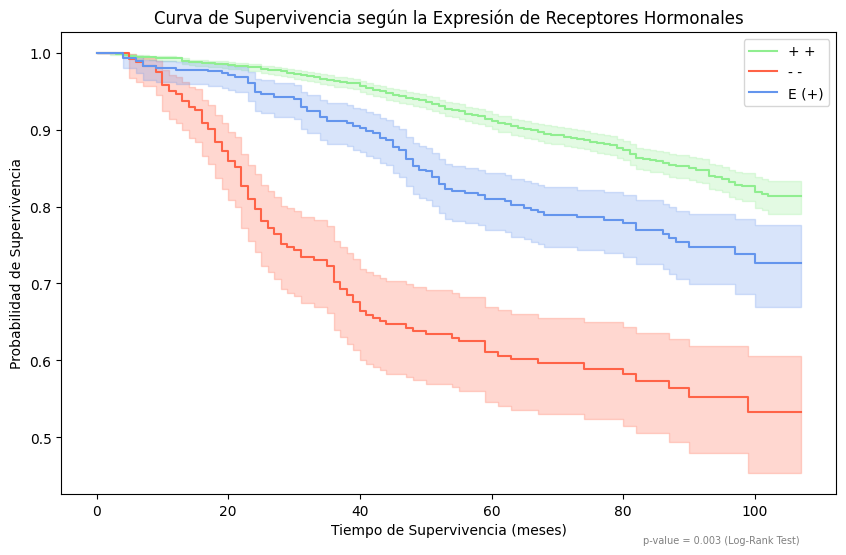

In [385]:
plt.figure(figsize=(10, 6))
kmf_doble_positivo.plot(ci_show=True,color='lightgreen')
kmf_doble_negativo.plot(ci_show=True,color='tomato')
kmf_estrogeno_positivo.plot(ci_show=True,color='cornflowerblue')


# Personalizar la gráfica
plt.title('Curva de Supervivencia según la Expresión de Receptores Hormonales')
plt.xlabel('Tiempo de Supervivencia (meses)')
plt.ylabel('Probabilidad de Supervivencia')

plt.legend()
plt.grid(False)
p_value_text = f"p-value = {result.p_value:.3f} (Log-Rank Test)"
plt.text(
    0.95 * plt.xlim()[1],  
    0.35 * plt.ylim()[1],  
    p_value_text,
    fontsize=7,
    color='grey',
    horizontalalignment='right', 
    verticalalignment='bottom'   
)


Estos hallazgos refuerzan la relevancia del perfil hormonal como predictor de supervivencia y destacan la importancia de tratamientos personalizados según la expresión de receptores hormonales.


### Resolviendo la Hipótesis 6

**Hipótesis**:  
*"La tasa de supervivencia en pacientes cuyo primer diagnóstico debuta con 
cancer de mama distal, es menor."*



**Distribución de Pacientes por Diagnóstico Inicial**

En el análisis se clasificaron los pacientes según el diagnóstico inicial, diferenciando entre los casos con compromiso **Regional** y aquellos con compromiso **Distant** (a distancia). Para visualizar esta información:

1. **Gráfica de Barras:**
   - Representa el número total de pacientes en cada categoría.
  

2. **Gráfica de Pastel:**
   - Representa la proporción de cada grupo en términos porcentuales.
   

In [386]:
df_final['a_stage'].value_counts()

a_stage
Regional    3932
Distant       92
Name: count, dtype: int64

C:\Users\JUTHA\AppData\Local\Temp\ipykernel_22576\4043180441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.index.map(label_translation), y=diagnosis_counts.values, palette=colores)


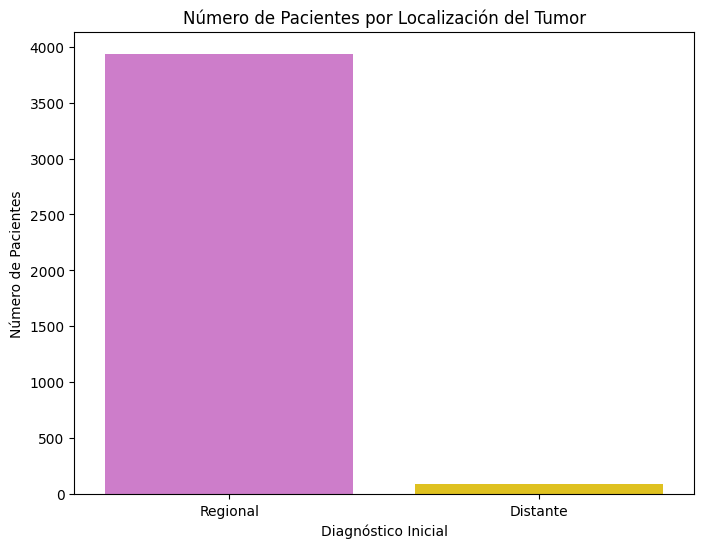

In [387]:
label_translation = {'Distant': 'Distante', 'Regional': 'Regional'}

diagnosis_counts = df_final['a_stage'].value_counts()
colores = ['orchid', 'gold']
plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.index.map(label_translation), y=diagnosis_counts.values, palette=colores)
plt.title("Número de Pacientes por Localización del Tumor")
plt.xlabel("Diagnóstico Inicial")
plt.ylabel("Número de Pacientes")
plt.show()

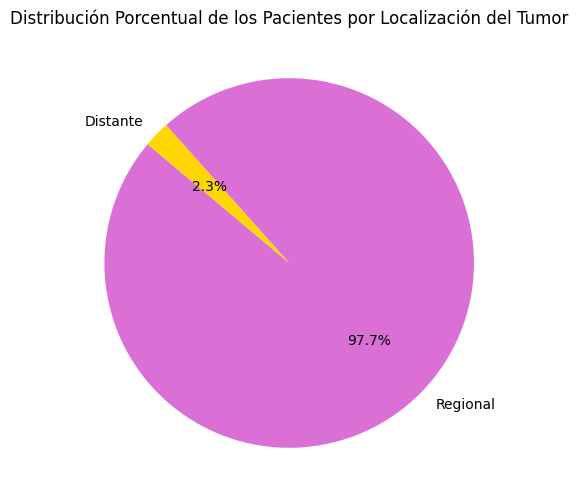

In [388]:

label_translation = {'Distant': 'Distante', 'Regional': 'Regional'}

plt.figure(figsize=(8, 6))
plt.pie(
    x=diagnosis_counts.values,  
    labels=diagnosis_counts.index.map(label_translation), 
    autopct='%1.1f%%',  
    colors=colores,  
    startangle=140  
)
plt.title("Distribución Porcentual de los Pacientes por Localización del Tumor")
plt.show()

En ambas gráficas se puede ver la distribución de pacientes según la localización inicial del tumor. Como se puede ver, un alto porcentaje de pacientes, cerca del 95%, fueron diagnosticados con tumores en la categoría regional. Esto implica que los tumores están limitados al área local o regional, lo cual tiene implicaciones clínicas positivas, ya que tienden a ser más tratables. Por otro lado, solo una pequeña proporción de casos se encuentra en la categoría distante, indicando presencia de metástasis. Esta información resalta la importancia de un diagnóstico temprano para evitar la progresión del cáncer hacia etapas más avanzadas."

**Curvas de Supervivencia Kaplan-Meier**

Para evaluar cómo el tipo de diagnóstico inicial afecta la supervivencia, se construyeron **curvas de Kaplan-Meier** para los grupos **Regional** y **Distant**.

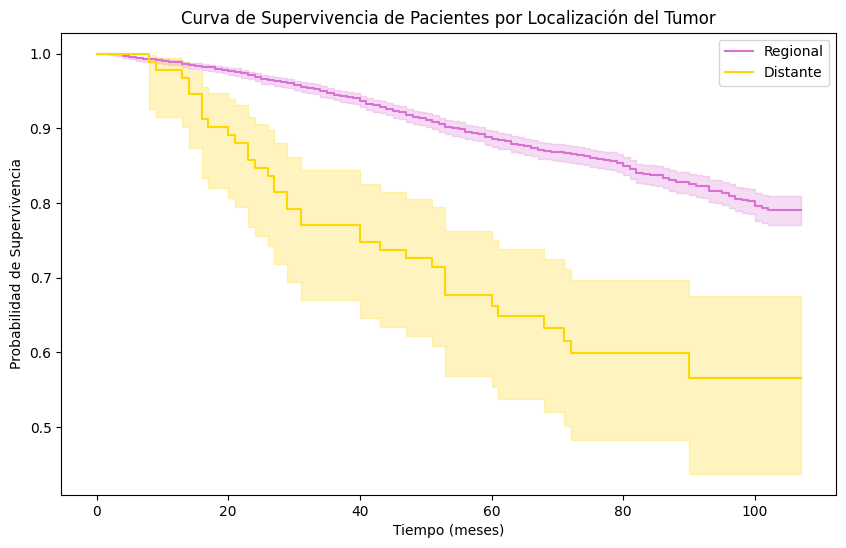

In [389]:
from lifelines import KaplanMeierFitter

# Filtrar por diagnóstico inicial
regional = df_final[df_final['a_stage'] == 'Regional']
distant = df_final[df_final['a_stage'] == 'Distant']

# Variables necesarias
time_regional = regional['survival_m']
event_regional = regional['status'].apply(lambda x: 1 if 'Dead' in x else 0)

time_distant = distant['survival_m']
event_distant = distant['status'].apply(lambda x: 1 if 'Dead' in x else 0)

# Crear el modelo Kaplan-Meier
kmf_regional = KaplanMeierFitter()
kmf_distant = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
kmf_regional.fit(durations=time_regional, event_observed=event_regional, label="Regional")
kmf_distant.fit(durations=time_distant, event_observed=event_distant, label="Distante")

kmf_regional.plot(color='orchid')
kmf_distant.plot(color='gold')

plt.title("Curva de Supervivencia de Pacientes por Localización del Tumor")
plt.xlabel("Tiempo (meses)")
plt.ylabel("Probabilidad de Supervivencia")
plt.legend()
plt.show()

Para analizar de manera simultánea todas las categorías de `a_stage`, realizaremos un **Log-Rank Test multivariado**. Esta prueba estadística:

1. Evalúa si existen **diferencias significativas entre todas las curvas de supervivencia en conjunto**.
2. Proporciona un p-valor global que indica si al menos una de las curvas difiere significativamente de las demás.

In [390]:
from lifelines.statistics import multivariate_logrank_test

# Prueba Log-Rank multivariada para comparar todas las curvas
result = multivariate_logrank_test(
    df_final['survival_m'],  # Columna con el tiempo hasta el evento
    df_final['a_stage'],  # Columna con los grupos categóricos 
    df_final['status']   # Columna con el indicador del evento (1 = evento, 0 = censura)
)

# Mostrar resultados
print(result)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           3.47 0.06      4.00


In [391]:
from lifelines.statistics import logrank_test

# Separar los datos por a_stage (Regional y Distante)
regional = df_final[df_final['a_stage'] == 'Regional']
distante = df_final[df_final['a_stage'] == 'Distant']

# Comparar Regional vs Distante
result_regional_vs_distante = logrank_test(
    regional['survival_m'], distante['survival_m'],
    event_observed_A=regional['status'].apply(lambda x: 1 if 'Dead' in x else 0),
    event_observed_B=distante['status'].apply(lambda x: 1 if 'Dead' in x else 0)
)

# Mostrar resultados con p-values y estadísticos
print("Regional vs Distante:", f"p-value = {result_regional_vs_distante.p_value:.3f}, test_statistic = {result_regional_vs_distante.test_statistic:.3f}")



Regional vs Distante: p-value = 0.000, test_statistic = 47.625


Como podemos observar, los pacientes diagnosticados con tumores regionales presentan una probabilidad de supervivencia significativamente mayor, mientras que aquellos con un diagnóstico distante experimentan una caída más pronunciada en la supervivencia a lo largo del tiempo. 

Este patrón resalta la importancia del diagnóstico temprano y la detección oportuna, ya que intervenir en etapas menos avanzadas podría mejorar de forma significativa los resultados clínicos. Las estadísticas reflejan cómo la progresión del tumor a estadios más lejanos afecta drásticamente las tasas de supervivencia.


### Resolviendo la Hipótesis 7

**Hipótesis**:  *"La detección de ganglios positivos está asociada con el diagnóstico temprano y predice una mejor supervivencia en pacientes con cáncer de mama".*

In [392]:
df_final['n_stage'].unique()

array(['N3', 'N2', 'N1'], dtype=object)

In [393]:
df_final['n_stage'].isnull().sum()

np.int64(0)

La gráfica muestra la distribución de pacientes por estadio N (N1, N2, N3) y su relación con las categorías de 6th Stage (IIA, IIB, IIIA, IIIB, IIIC) para diagnósticos tempranos y tardíos.

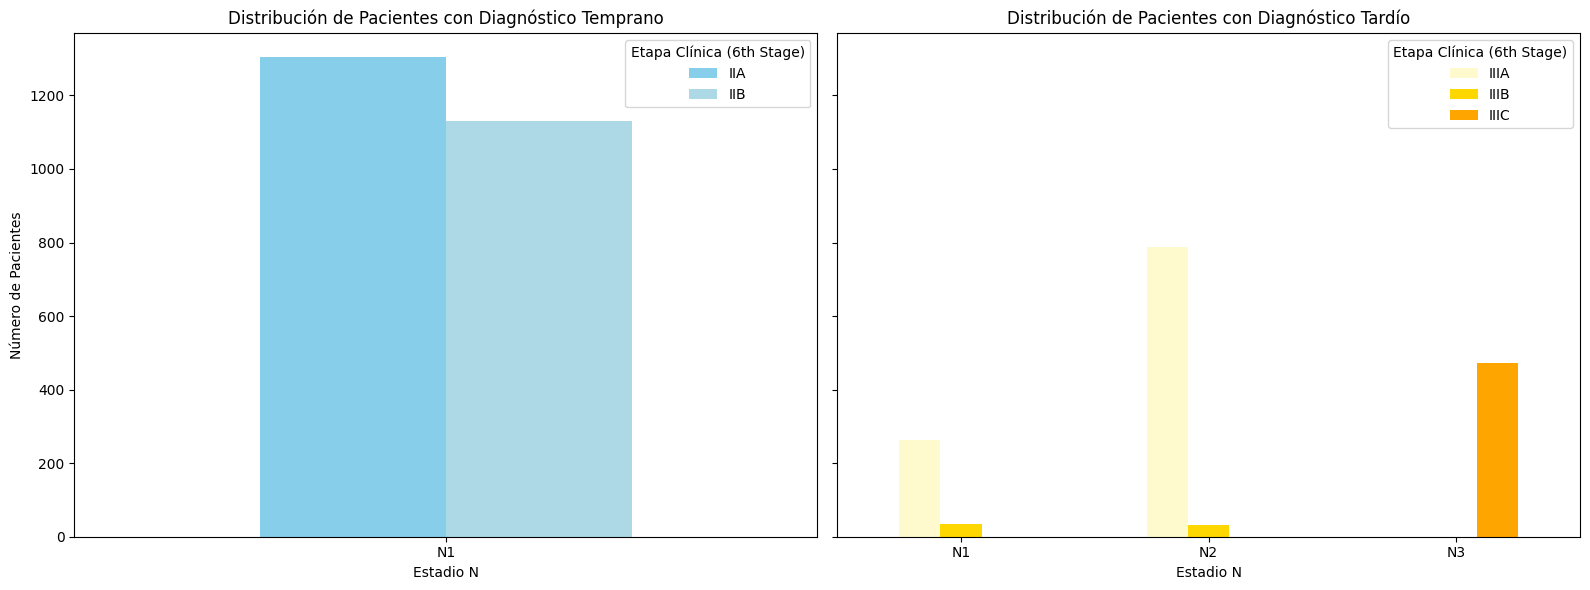

In [398]:
# Gráfico de barras agrupadas
contingencia_temprano = pd.crosstab(diagnostico_temprano['n_stage'], diagnostico_temprano['6th_stage'])
contingencia_tardio = pd.crosstab(diagnostico_tardio['n_stage'], diagnostico_tardio['6th_stage'])

# Configuración
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Diagnóstico temprano
colores = ['skyblue', 'lightblue', 'yellow', 'gold', 'orange']
contingencia_temprano.plot(kind='bar', ax=axes[0], color=['skyblue','lightblue'])
axes[0].set_title("Distribución de Pacientes con Diagnóstico Temprano")
axes[0].set_xlabel("Estadio N")
axes[0].set_ylabel("Número de Pacientes")
axes[0].legend(title="Etapa Clínica (6th Stage)", loc="upper right")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)  # Etiquetas horizontales

# Diagnóstico tardío
contingencia_tardio.plot(kind='bar', ax=axes[1], color=['lemonchiffon','gold','orange'])
axes[1].set_title("Distribución de Pacientes con Diagnóstico Tardío")
axes[1].set_xlabel("Estadio N")
axes[1].legend(title="Etapa Clínica (6th Stage)", loc="upper right")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)  # Etiquetas horizontales

# Ajuste
plt.tight_layout()




- **Gráfico izquierdo**: Aquí observamos a los pacientes con diagnóstico temprano en las etapas clínicas IIA e IIB. La mayoría de ellos se encuentran en el estadio N1, con cantidades similares entre las dos etapas, superando los 1,200 pacientes por grupo.

- **Gráfico derecho**: Este gráfico muestra a los pacientes con diagnóstico tardío, abarcando las etapas clínicas IIIA, IIIB y IIIC. 
  - Es evidente que la mayoría de los pacientes en diagnóstico tardío se concentran en IIIA, principalmente en el estadio N2, con algunos en N1. 
  - Los pacientes en IIIB y IIIC son significativamente menos numerosos, siendo un grupo minoritario.

**¿Qué podemos interpretar de estos datos?**
1. El estadio N1 es predominante en diagnósticos tempranos.
2. En diagnósticos tardíos, la progresión a N2 se observa con mayor frecuencia, destacando su relación con la etapa IIIA.

Finalmente, estos datos refuerzan la importancia del diagnóstico temprano para limitar la progresión hacia estadios más avanzados como N2 y N3. Esto tiene implicaciones directas en la supervivencia y en el manejo terapéutico de los pacientes.


## Conclusiones e implicaciones clínicas

| **Conclusión**                                    | **Implicación Clínica**                                       |
|---------------------------------------------------|--------------------------------------------------------------|
| **Disparidades raciales:** Reducirlas mejora la supervivencia. | Implementar acceso equitativo a diagnósticos y tratamientos.     |
| **Diagnóstico temprano:** Mejora resultados clínicos.          | Reforzar tamizaje y estrategias de detección temprana.        |
| **Tamaño del tumor:** Tumores pequeños tienen mejor pronóstico. | Identificar y tratar tumores en etapas iniciales.             |
| **Estatus hormonal:** Mejores opciones en perfiles favorables. | Personalizar tratamientos según perfil hormonal.              |
| **Localización del tumor:** Regionales tienen mejor pronóstico. | Detectar temprano para prevenir progresión a estadios avanzados. |
| **Ganglios afectados:** Relación directa con menor supervivencia. | Diagnosticar antes de que los ganglios sean afectados.        |
| **Diagnóstico temprano por raza:** No hay diferencias significativas. | Enfocar esfuerzos en mantener equidad en tasas de detección. |

